In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import scipy.stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score)
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

## 1. Data Exploration

We will download the data, store it in variables, and review the general information to check its consistency with the provided description.

### 1.1 Dataset #1 `ferma_main` &mdash; main information about the customer's herd

In [2]:
try:
    data = pd.read_csv('D:\docs\DS\ferma_main.csv', delimiter=';', decimal=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', delimiter=';', decimal=',')
    

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

There are no missing values in the customer's herd data, which is excellent.  

We will rename the dataset columns and format them according to style guidelines:  
* Удой, кг &mdash; `yield_kg`  
* ЭКЕ (Энергетическая кормовая единица) &mdash; `fcr` (feed conversion ratio)  
* Сырой протеин, г &mdash; `raw_protein_g`  
* СПО (Сахаро-протеиновое соотношение) &mdash; `sugar_proteins`  
* Порода &mdash; `breed`  
* Тип пастбища &mdash; `grassland_type`  
* порода папы_быка &mdash; `dads_breed`  
* Жирность, % &mdash; `fats`  
* Белок, % &mdash; `proteins`  
* Вкус молока &mdash; `taste`  
* Возраст &mdash; `age`  

In [3]:
data.columns = ['id', 'yield_kg', 'fcr', 'raw_protein_g', 
                'sugar_proteins', 'breed', 'grassland_type', 
                'dads_breed', 'fats', 'proteins',
                'taste', 'age']
data.head()

id  yield_kg   fcr  raw_protein_g  sugar_proteins            breed  \
0   1      5863  14.2           1743           0.890   Вис Бик Айдиал   
1   2      5529  12.8           2138           0.890   Вис Бик Айдиал   
2   3      5810  14.0           1854           0.885  РефлешнСоверинг   
3   4      5895  12.4           2012           0.885  РефлешнСоверинг   
4   5      5302  12.8           1675           0.885   Вис Бик Айдиал   

  grassland_type dads_breed  fats  proteins      taste          age  
0      Равнинное     Айдиал  3.58     3.076     вкусно  более_2_лет  
1      Равнинные    Соверин  3.54     3.079     вкусно  менее_2_лет  
2      Холмистое    Соверин  3.59     3.074  не вкусно  более_2_лет  
3      Холмистое     Айдиал  3.40     3.075  не вкусно  более_2_лет  
4      Равнинные    Соверин  3.73     3.073     вкусно  менее_2_лет

### 1.2 Dataset #2 `ferma_dad` &mdash; information about cow lineage  

We will load and review the second provided dataset, which contains information about the sires of the customer's cows.  

In [4]:
try:
    ferma_dad = pd.read_csv('D:\docs\DS\ferma_dad.csv', delimiter=';')
except:
    ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', delimiter=';')
    
ferma_dad.info()
ferma_dad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

The table contains 629 observations with no missing values. Rename the second column according to the style guidelines:  

In [5]:
ferma_dad.rename(columns={'Имя Папы' : 'dads_name'}, inplace=True)
ferma_dad.head()

id dads_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

### 1.3 Dataset #3 `cow_buy` &mdash; information about new cows  
Review the dataset provided to the customer by the cow seller.  

In [6]:
try:
    cow_buy = pd.read_csv('D:\docs\DS\cow_buy.csv', delimiter=';', decimal=',')
except:
    cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', delimiter=';', decimal=',')
    
cow_buy.info()
cow_buy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

In the seller's dataset, we see columns with names similar to those in the customer's herd dataset.  

We will assign matching names to this dataset:  

In [7]:
cow_buy.columns = ['breed', 'grassland_type', 'dads_breed', 'dads_name', 
                   'fats', 'proteins', 'age']  
cow_buy.head()

breed grassland_type dads_breed dads_name  fats  proteins  \
0   Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
1   Вис Бик Айдиал      равнинное    Соверин    Буйный  3.54     3.081   
2  РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
3  РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.061   
4  РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   

           age  
0  более_2_лет  
1  менее_2_лет  
2  более_2_лет  
3  более_2_лет  
4  более_2_лет

## 2. Data Preprocessing  

In the previous step, we confirmed that all three datasets contain no missing values. Now, we will check them for duplicates.  

Let's start with the first dataset, which contains information about the customer's herd. The dataframe includes data on **634** cows, while the sire information dataset has only **629** observations. This discrepancy is likely due to duplicates in the first column. Let's verify this:  


In [8]:
data.duplicated().sum()

5

Indeed, the main dataset contains exact duplicates.  
Remove them and check the resulting number of rows:  

In [10]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              629 non-null    int64  
 1   yield_kg        629 non-null    int64  
 2   fcr             629 non-null    float64
 3   raw_protein_g   629 non-null    int64  
 4   sugar_proteins  629 non-null    float64
 5   breed           629 non-null    object 
 6   grassland_type  629 non-null    object 
 7   dads_breed      629 non-null    object 
 8   fats            629 non-null    float64
 9   proteins        629 non-null    float64
 10  taste           629 non-null    object 
 11  age             629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


The main dataset now contains **629** rows—the same as the dataset with cow lineage information.  
Next, we will check the unique values in the columns containing string data.

In [11]:
print(f"информация о коровах заказчика \n"
      f"Разновидности пород: {data['breed'].unique()} \n"
      f"Разновидности пастбищ: {data['grassland_type'].unique()} \n"
      f"Разновидноси пород родителей: {data['dads_breed'].unique()} \n"
      f"Возраст: {data['age'].unique()} \n"
      f"Быки: {ferma_dad['dads_name'].unique()} \n"
      f"Вкусовые качества: {data['taste'].unique()} \n \n"
      f"Информация о коровах продавца \n"
      f"Разновидности пород: {cow_buy['breed'].unique()} \n"
      f"Разновидности пастбищ: {cow_buy['grassland_type'].unique()} \n"
      f"Разновидноси пород родителей: {cow_buy['dads_breed'].unique()} \n"
      f"Возраст: {cow_buy['age'].unique()} \n"
      f"Быки: {cow_buy['dads_name'].unique()} \n"
     
     )

информация о коровах заказчика 
Разновидности пород: ['Вис Бик Айдиал' 'РефлешнСоверинг'] 
Разновидности пастбищ: ['Равнинное' 'Равнинные' 'Холмистое'] 
Разновидноси пород родителей: ['Айдиал' 'Соверин' 'Айдиалл'] 
Возраст: ['более_2_лет' 'менее_2_лет'] 
Быки: ['Буйный' 'Соловчик' 'Барин' 'Геркулес'] 
Вкусовые качества: ['вкусно' 'не вкусно'] 
 
Информация о коровах продавца 
Разновидности пород: ['Вис Бик Айдиал' 'РефлешнСоверинг'] 
Разновидности пастбищ: ['холмистое' 'равнинное'] 
Разновидноси пород родителей: ['Айдиал' 'Соверин'] 
Возраст: ['более_2_лет' 'менее_2_лет'] 
Быки: ['Геркулес' 'Буйный' 'Барин' 'Соловчик'] 



In the customer's dataset, we will standardize the breed name `Айдиал` and the pasture type `Равнинное`.  

Additionally, we will convert pasture types to lowercase to ensure consistency between the customer's and the seller's datasets.  

In [12]:
data.loc[data['grassland_type'] == 'Равнинные', 'grassland_type'] = 'Равнинное'
data['grassland_type'] = data['grassland_type'].str.lower()


data.loc[data['dads_breed'] == 'Айдиалл', 'dads_breed'] = 'Айдиал'

print(data['grassland_type'].unique(),
      data['dads_breed'].unique())

['равнинное' 'холмистое'] ['Айдиал' 'Соверин']


Check the customer's datasets once again for exact duplicates

In [13]:
print(f"Number of duplicates in the herd dataset: {data.duplicated().sum()} \n"
      f"Number of duplicates in the sire information dataset: {ferma_dad.duplicated().sum()}")

Number of duplicates in the herd dataset: 0 
Number of duplicates in the sire information dataset: 0


Check the vendor's datasets for exact duplicates

In [14]:
print(cow_buy.shape)
cow_buy[cow_buy.duplicated()]

(20, 7)


breed grassland_type dads_breed dads_name  fats  proteins  \
6    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
8   РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
14  РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
19  РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   

            age  
6   более_2_лет  
8   более_2_лет  
14  более_2_лет  
19  более_2_лет

Four out of 20 observations, meaning one-fifth of the seller's dataset, are duplicates.  

In this case, we can assume that these "duplicates" represent cows from the same sire, grazing on the same type of pasture, and having similar milk characteristics.  

In all three datasets, textual data can be converted to categorical type: pasture types, breeds, names, and age are more convenient to analyze as categories in the context of this study.  

In [15]:
for column in ['id', 'grassland_type', 'breed', 'dads_breed', 'age', 'taste']:
    data[column] = data[column].astype('category')
    
for column in ['grassland_type', 'breed', 'dads_breed', 'age', 'dads_name']:    
    cow_buy[column] = cow_buy[column].astype('category')
    
ferma_dad['dads_name'] = ferma_dad['dads_name'].astype('category')

## 3. Exploratory Data Analysis

In [18]:
def data_boxplot(df, column, title):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    fig.suptitle(f"{title}", fontsize=16)
    sns.histplot(df[column], kde=True, bins=20, ax=ax[0])
    ax[0].set_title('Histogram', fontsize=15)
    q1 = df[column].quantile(0.25).round(1)
    q3 = df[column].quantile(0.75).round(1)
    IQR = q3 - q1
    
    sns.boxplot(df[column], ax=ax[1])
    ax[1].set_title('Boxplot', fontsize=15)
    plt.show()
    
    print(f"Median: {df[column].median()} \n"
          f"Mean: {df[column].mean().round(1)} \n"
          f"Min: {df[column].min()} \n"
          f"Max: {df[column].max()} \n"
          f"Upper outlier threshold: {(q3 + 1.5 * IQR).round(2)} \n"
          f"Lower outlier threshold: {(q1 - 1.5 * IQR).round(2)} \n"
          f"Q1: {q1} \n"
          f"Q3: {q3}"
         )

def data_hist(df, column, title, xlabel, ylabel, bins, range_ox):    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    df[column].hist(bins=bins, range=range_ox)
    plt.show()
    q1 = df[column].quantile(0.25).round(1)
    q3 = df[column].quantile(0.75).round(1)
    IQR = q3 - q1
    print(f"Median: {df[column].median()} \n"
          f"Mean: {df[column].mean().round(1)} \n"
          f"Min: {df[column].min()} \n"
          f"Max: {df[column].max()} \n"
          f"Upper outlier threshold: {(q3 + 1.5 * IQR).round(2)} \n"
          f"Lower outlier threshold: {(q1 - 1.5 * IQR).round(2)}"
         )

def data_bar(df, x, quantity, title, xlabel):
    sns.barplot(data=df, x=x, y=quantity)
    sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white')
    sns.set(font_scale=1.2)
    plt.title(title)
    plt.xlabel(xlabel, fontsize=15, fontweight='bold', labelpad=6)
    plt.ylabel('Number of values', fontsize=15, fontweight='bold')
    plt.grid(True)
    plt.show()
    
def data_pie(df, x, y, title):
    plt.figure(figsize=(8,8))
    plt.pie(x=df[x], labels=df[y], autopct='%1.2f%%', textprops={'fontsize':12})
    plt.title(label=title, fontdict={"fontsize":16}, pad=20)
    plt.show()


### 3.1. Quantitative Variables

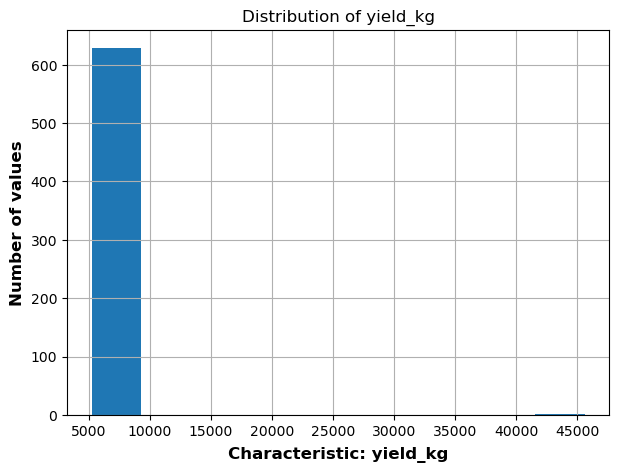

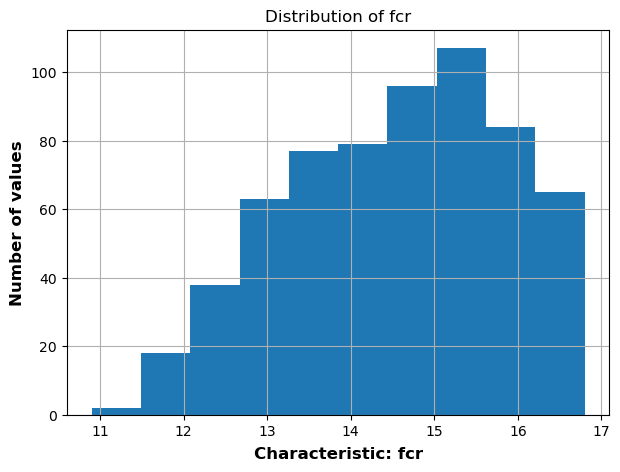

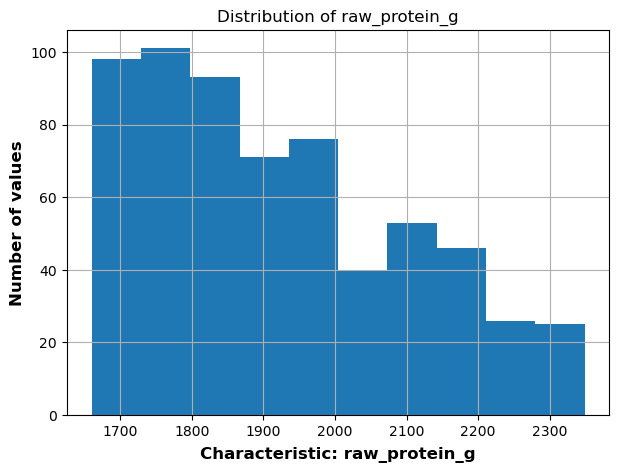

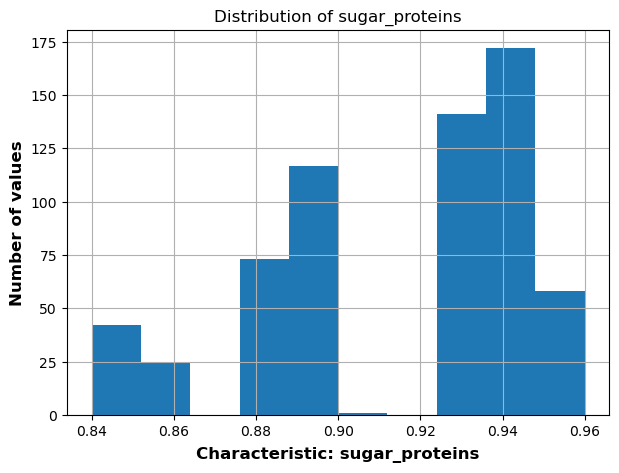

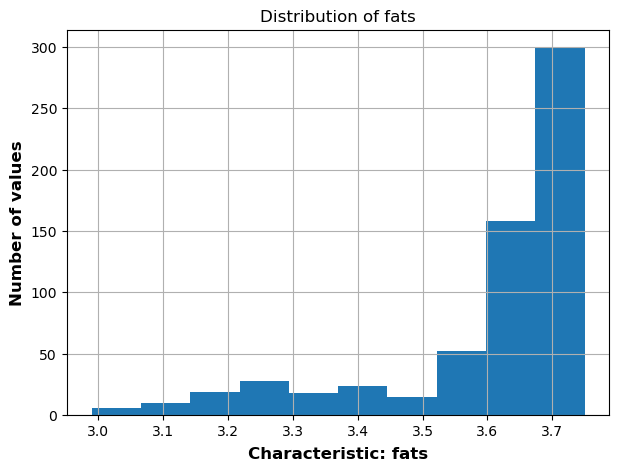

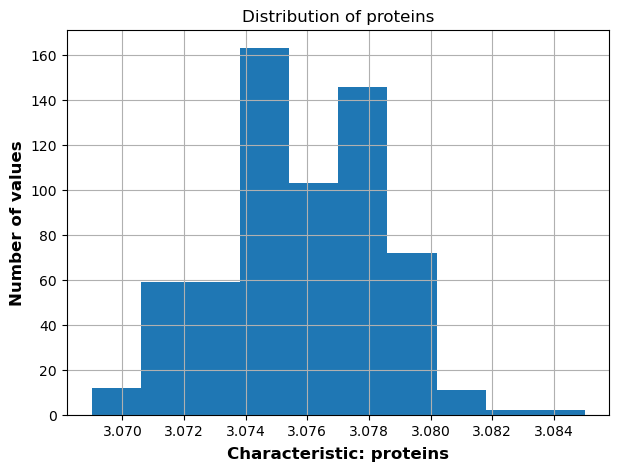

In [17]:
columns = data.columns.tolist()

for column in columns:
    if data.dtypes[column] == 'category':
        pass
    else:
        data[column].hist(bins=10, figsize=(7, 5))
        plt.title(f'Distribution of {column}')
        plt.xlabel(f'Characteristic: {column}', 
                   fontsize=12, fontweight='bold', labelpad=6)
        plt.ylabel('Number of values', fontsize=12, fontweight='bold')
        plt.show()

In [19]:
data.select_dtypes(include=['number']).corr()

yield_kg       fcr  raw_protein_g  sugar_proteins      fats  \
yield_kg        1.000000  0.131138       0.077052        0.253090  0.086023   
fcr             0.131138  1.000000       0.390669        0.743646  0.640344   
raw_protein_g   0.077052  0.390669       1.000000        0.444443  0.360715   
sugar_proteins  0.253090  0.743646       0.444443        1.000000  0.624457   
fats            0.086023  0.640344       0.360715        0.624457  1.000000   
proteins        0.005793 -0.009380       0.226185        0.073809 -0.026901   

                proteins  
yield_kg        0.005793  
fcr            -0.009380  
raw_protein_g   0.226185  
sugar_proteins  0.073809  
fats           -0.026901  
proteins        1.000000

**`yield_kg`**

In the distribution of milk yield indicators, we see an outlier around 45,000 kg. This value is clearly erroneous, as the majority of the data points are concentrated in the range of 5,000 to 10,000 kg. Let's examine these values to decide whether they should be removed.

In [20]:
data.query("yield_kg > 10000")

id  yield_kg   fcr  raw_protein_g  sugar_proteins           breed  \
16  17     45616  11.5           1675            0.93  Вис Бик Айдиал   

   grassland_type dads_breed  fats  proteins   taste          age  
16      холмистое     Айдиал  3.22     3.076  вкусно  более_2_лет

We have only one value exceeding 10,000 kg. We can remove it from the dataset and review the parameter distribution again.

In [21]:
data = data.query("yield_kg < 10000")
data

id  yield_kg   fcr  raw_protein_g  sugar_proteins            breed  \
0      1      5863  14.2           1743           0.890   Вис Бик Айдиал   
1      2      5529  12.8           2138           0.890   Вис Бик Айдиал   
2      3      5810  14.0           1854           0.885  РефлешнСоверинг   
3      4      5895  12.4           2012           0.885  РефлешнСоверинг   
4      5      5302  12.8           1675           0.885   Вис Бик Айдиал   
..   ...       ...   ...            ...             ...              ...   
624  625      6812  15.4           1964           0.940  РефлешнСоверинг   
625  626      5513  12.9           1700           0.880  РефлешнСоверинг   
626  627      5970  14.4           1837           0.880  РефлешнСоверинг   
627  628      5746  13.8           1994           0.890  РефлешнСоверинг   
628  629      6503  16.2           2283           0.940   Вис Бик Айдиал   

    grassland_type dads_breed  fats  proteins      taste          age  
0        равнинное     Айдиал  3.58     3.076     вкусно  более_2_лет  
1        равнинное    Соверин  3.54     3.079     вкусно  менее_2_лет  
2        холмистое    Соверин  3.59     3.074  не вкусно  более_2_лет  
3        холмистое     Айдиал  3.40     3.075  не вкусно  более_2_лет  
4        равнинное    Соверин  3.73     3.073     вкусно  менее_2_лет  
..             ...        ...   ...       ...        ...          ...  
624      равнинное     Айдиал  3.74     3.075  не вкусно  более_2_лет  
625      равнинное    Соверин  3.64     3.073     вкусно  менее_2_лет  
626      холмистое    Соверин  3.64     3.075  не вкусно  более_2_лет  
627      равнинное    Соверин  3.64     3.077     вкусно  более_2_лет  
628      холмистое    Соверин  3.71     3.076     вкусно  более_2_лет  

[628 rows x 12 columns]

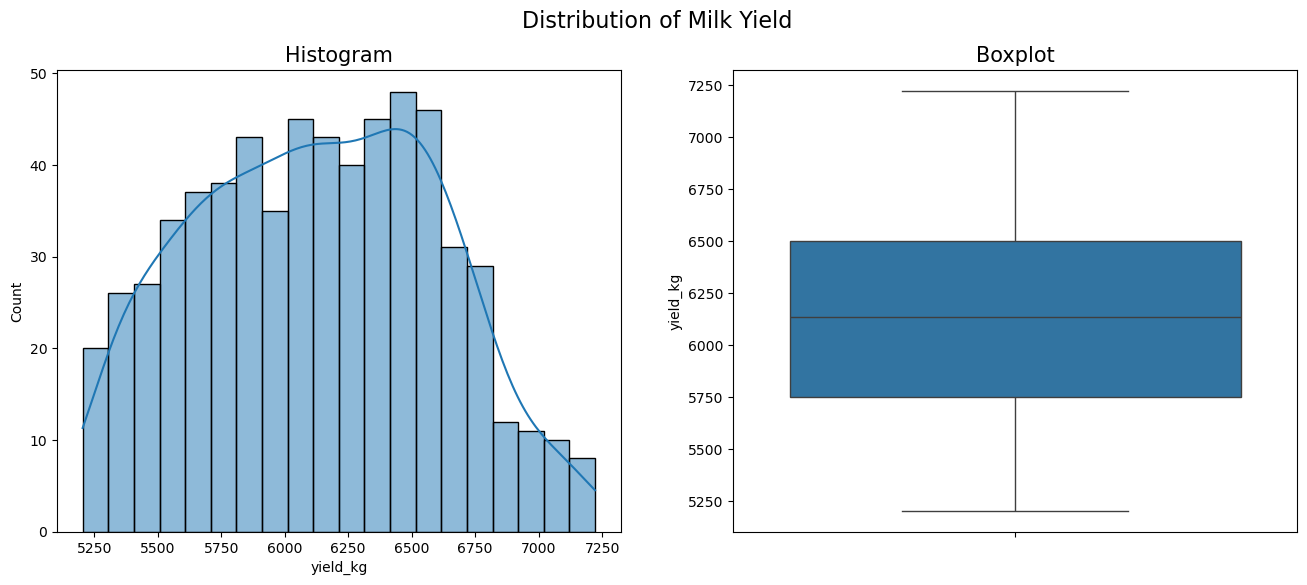

Median: 6132.5 
Mean: 6126.0 
Min: 5204 
Max: 7222 
Upper outlier threshold: 7627.8 
Lower outlier threshold: 4623.0 
Q1: 5749.8 
Q3: 6501.0


In [22]:
data_boxplot(data, 'yield_kg', 'Distribution of Milk Yield')

**`fcr`**

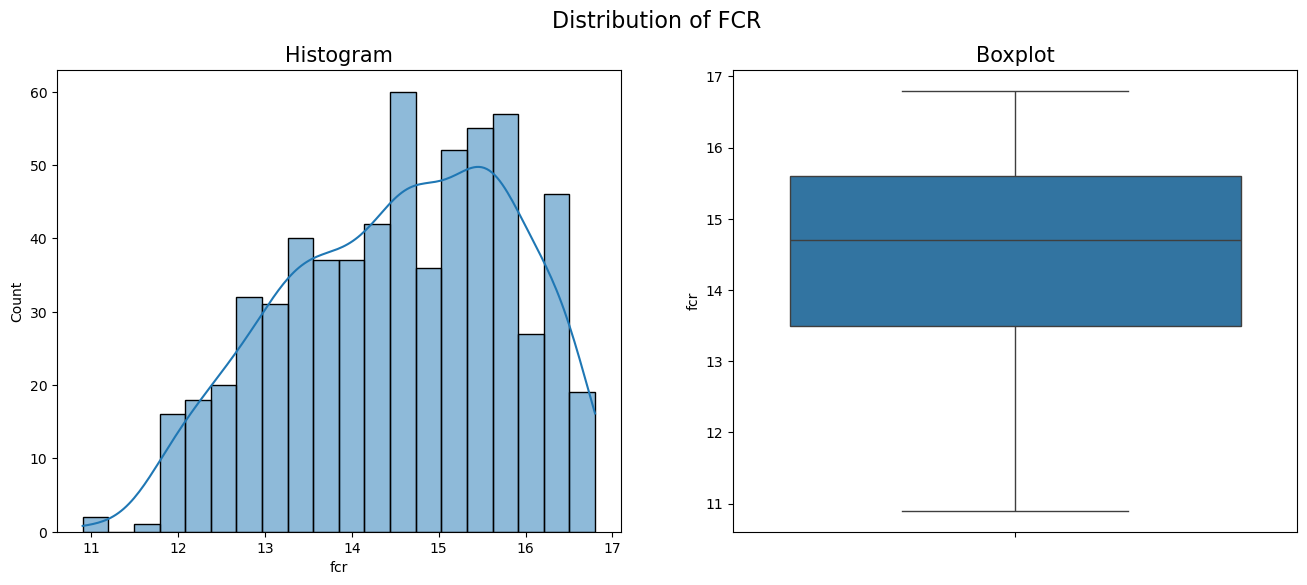

Median: 14.7 
Mean: 14.5 
Min: 10.9 
Max: 16.8 
Upper outlier threshold: 18.75 
Lower outlier threshold: 10.35 
Q1: 13.5 
Q3: 15.6


In [24]:
data_boxplot(data, 'fcr', 'Distribution of FCR')

The distribution can be considered normal, with right skewness and no outliers.

**`raw_protein_g`**

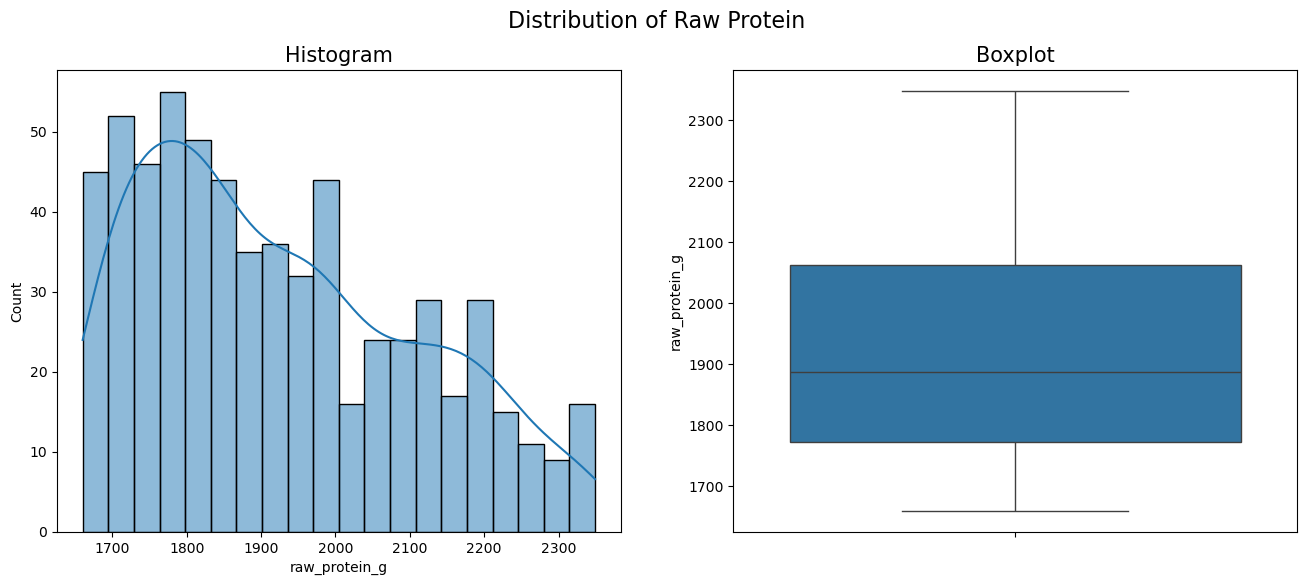

Median: 1888.0 
Mean: 1923.8 
Min: 1660 
Max: 2349 
Upper outlier threshold: 2497.8 
Lower outlier threshold: 1336.2 
Q1: 1771.8 
Q3: 2062.2


In [25]:
data_boxplot(data, 'raw_protein_g', 'Distribution of Raw Protein')

Normal distribution with left skewness and no outliers.

**`sugar_proteins`**

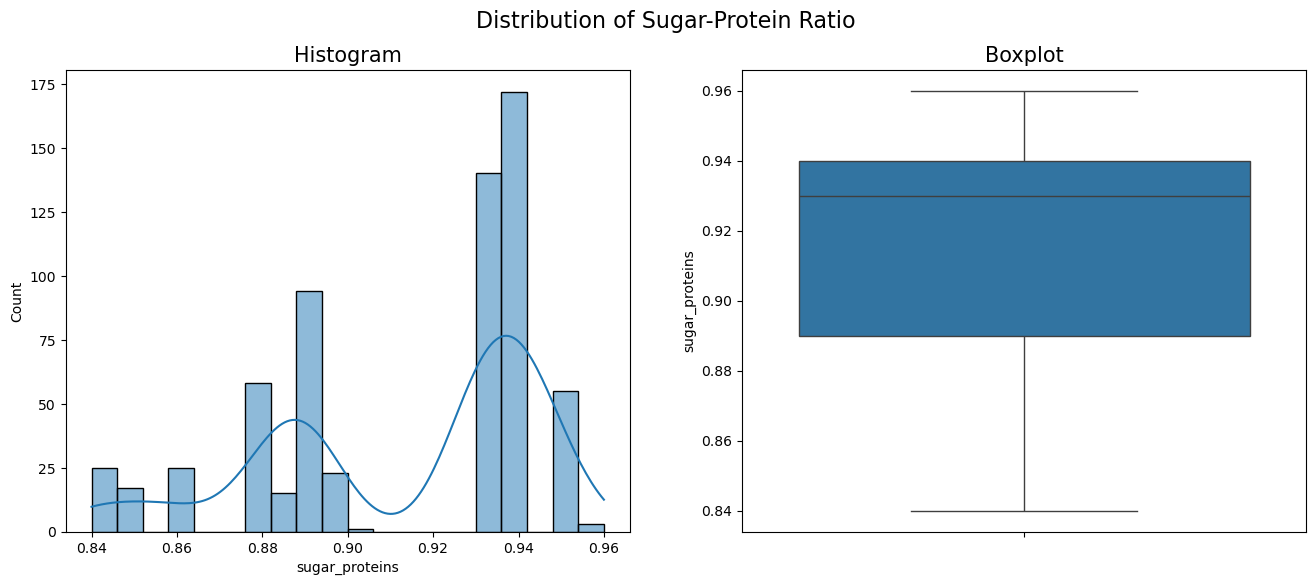

Median: 0.93 
Mean: 0.9 
Min: 0.84 
Max: 0.96 
Upper outlier threshold: 0.9 
Lower outlier threshold: 0.9 
Q1: 0.9 
Q3: 0.9


In [26]:
data_boxplot(data, 'sugar_proteins', 'Distribution of Sugar-Protein Ratio')

A normal distribution with multiple peaks. We will not remove observations with SPO values below 0.9 and above 0.9 from the dataset.

**`fats`**

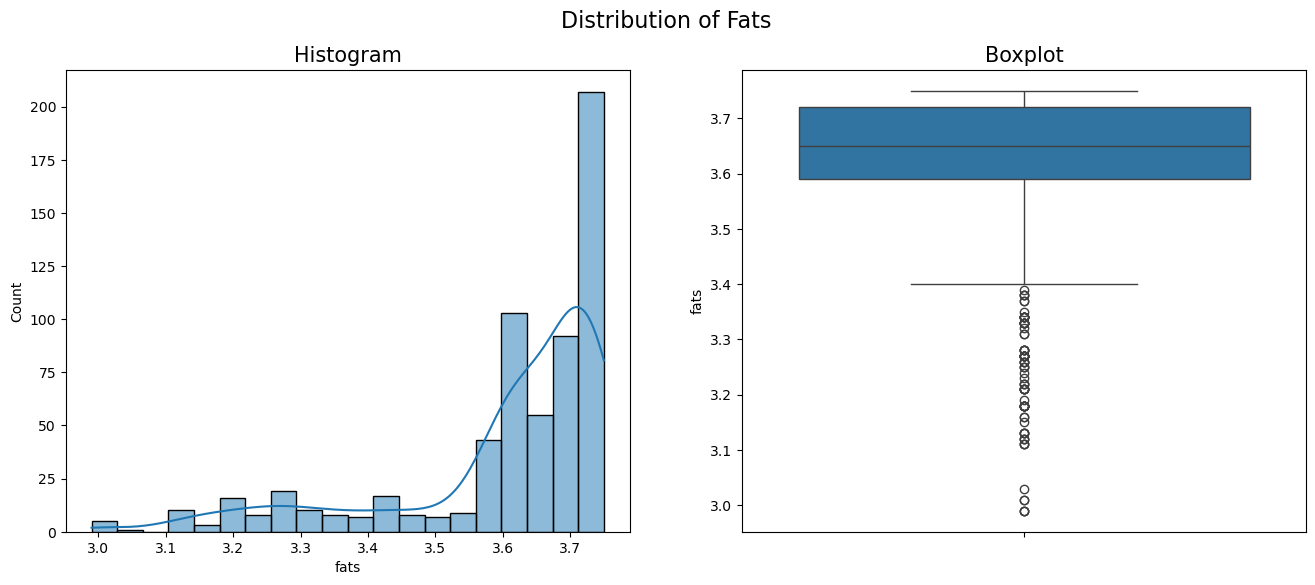

Median: 3.65 
Mean: 3.6 
Min: 2.99 
Max: 3.75 
Upper outlier threshold: 3.85 
Lower outlier threshold: 3.45 
Q1: 3.6 
Q3: 3.7


In [27]:
data_boxplot(data, 'fats', 'Distribution of Fats')

A normal asymmetric distribution, skewed to the right. A large number of outliers are observed.

In [28]:
data.query("fats < 3.45").shape

(104, 12)

Out of **628** rows in the dataset, **104** observations are outliers based on the milk fat content characteristic. First, let's check if there are any cows available for purchase that produce milk with a fat content below 3.45%. It is possible that, within the scope of this study, milk with lower fat content is not of interest to us at all.

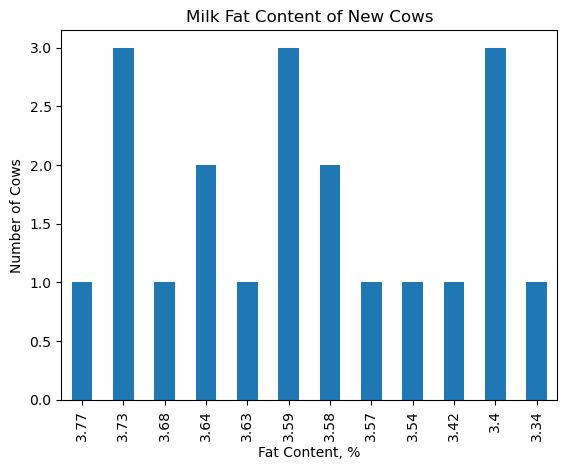

In [29]:
(cow_buy.reset_index().pivot_table(index='fats', values='index', aggfunc='count')
    .rename(columns={'index': 'quantity'})
    .reset_index()
    .sort_values('fats', ascending=False)
    .set_index('fats')
    .plot(y='quantity', kind='bar', title='Milk Fat Content of New Cows', 
          ylabel="Number of Cows", xlabel='Fat Content, %', legend=False)
)

plt.show()

Among the herd of cows available for purchase, 5 out of 20 produce milk with a fat content below 3.45%. I suggest keeping the observations with fat content outliers in the dataset for now: there are too many of them to simply remove, and replacing them with a median value could create a false correlation between features.

**`proteins`**

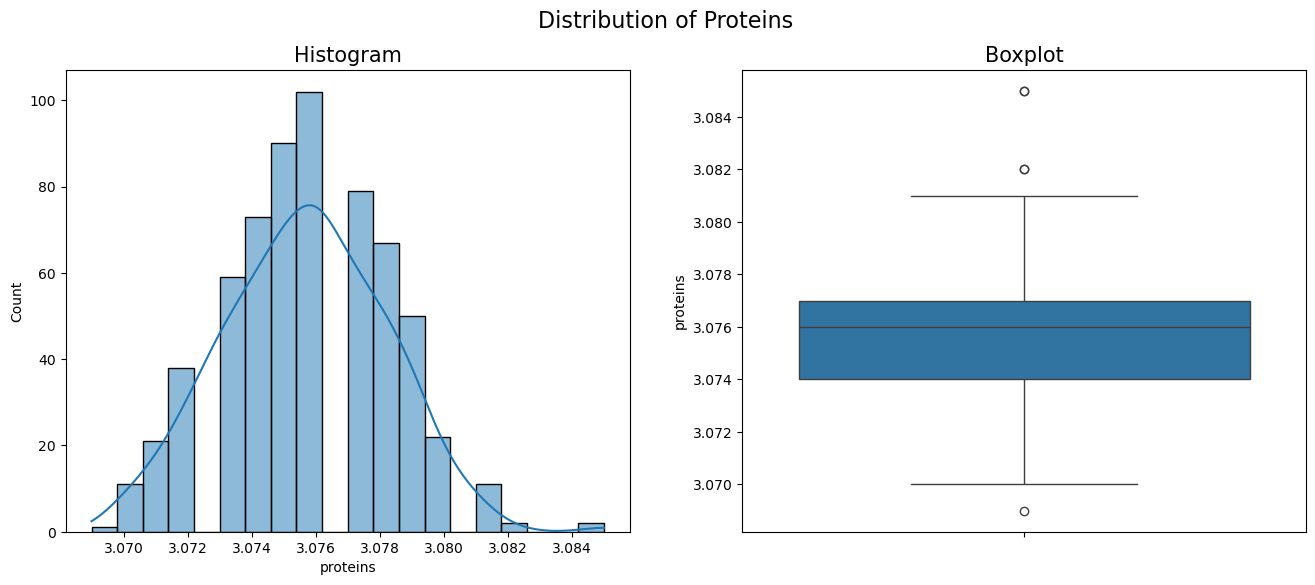

Median: 3.076 
Mean: 3.1 
Min: 3.069 
Max: 3.085 
Upper outlier threshold: 3.1 
Lower outlier threshold: 3.1 
Q1: 3.1 
Q3: 3.1


In [30]:
data_boxplot(data, 'proteins', 'Distribution of Proteins')

### 3.2. Categorical Variables
Before proceeding with visualizing the distribution of categorical variables, let's write a function that will create a pivot table for a bar chart.

In [31]:
def pivot_data (df, index, values):
    pivot = (df.pivot_table(index=index, values=values, aggfunc='count')
                .rename(columns = {'id': 'quantity'})
                .reset_index()
                .sort_values('quantity', ascending=False)                
            )      
    return pivot   

**`breed`**

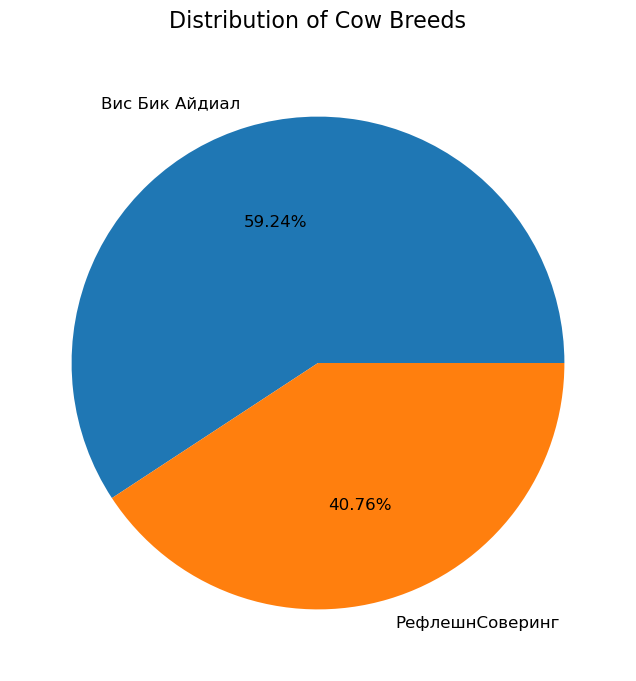

In [32]:
pivot_breed = pivot_data(data, 'breed', 'id')

data_pie(pivot_breed, 'quantity', 'breed', 'Distribution of Cow Breeds')

**`grassland_type`**

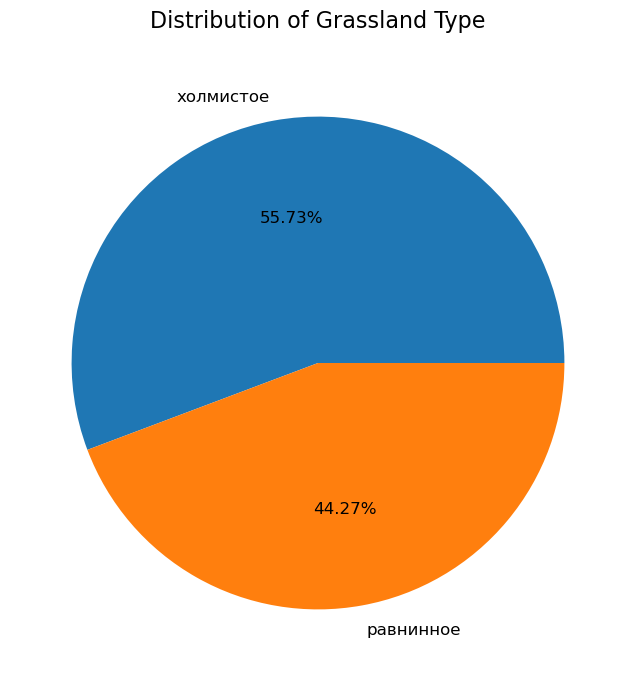

In [33]:
pivot_grassland_type = pivot_data(data, 'grassland_type', 'id')
data_pie(pivot_grassland_type, 'quantity', 'grassland_type', 'Distribution of Grassland Type')

**`dads_breed`**

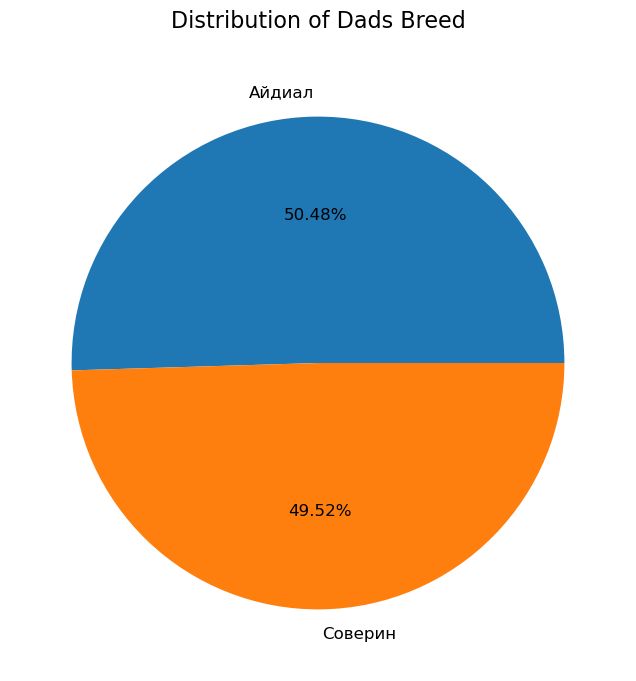

In [34]:
pivot_dads_breed = pivot_data(data, 'dads_breed', 'id')
data_pie(pivot_dads_breed, 'quantity', 'dads_breed', 'Distribution of Dads Breed')

**`taste`**

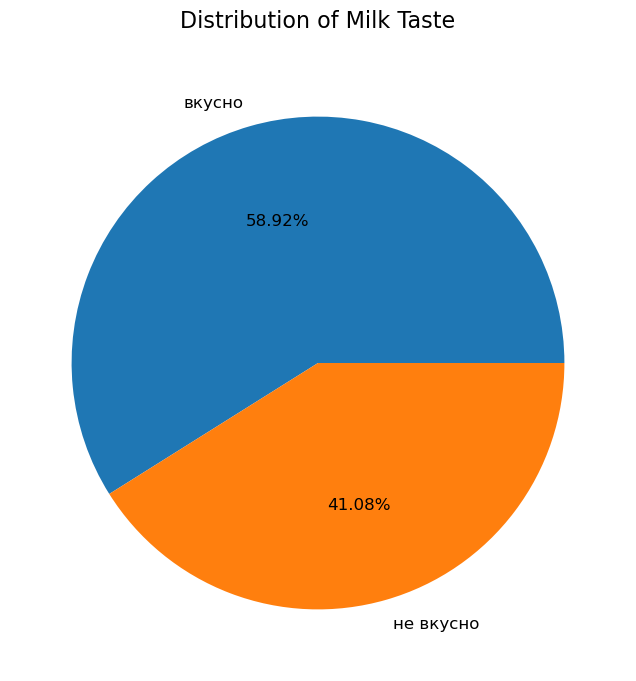

In [35]:
pivot_taste = pivot_data(data, 'taste', 'id')
data_pie(pivot_taste, 'quantity', 'taste', 'Distribution of Milk Taste')

**`age`**

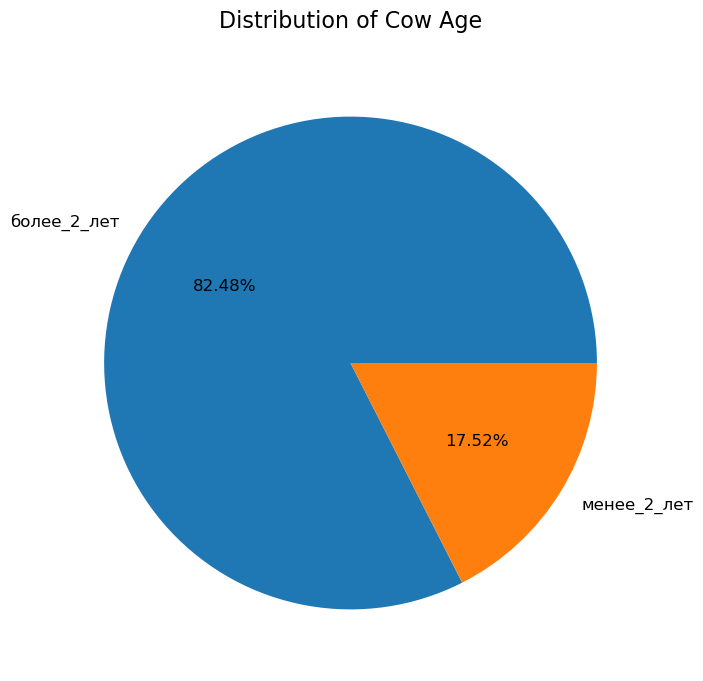

In [36]:
pivot_age = pivot_data(data, 'age', 'id')
data_pie(pivot_age, 'quantity', 'age', 'Distribution of Cow Age')

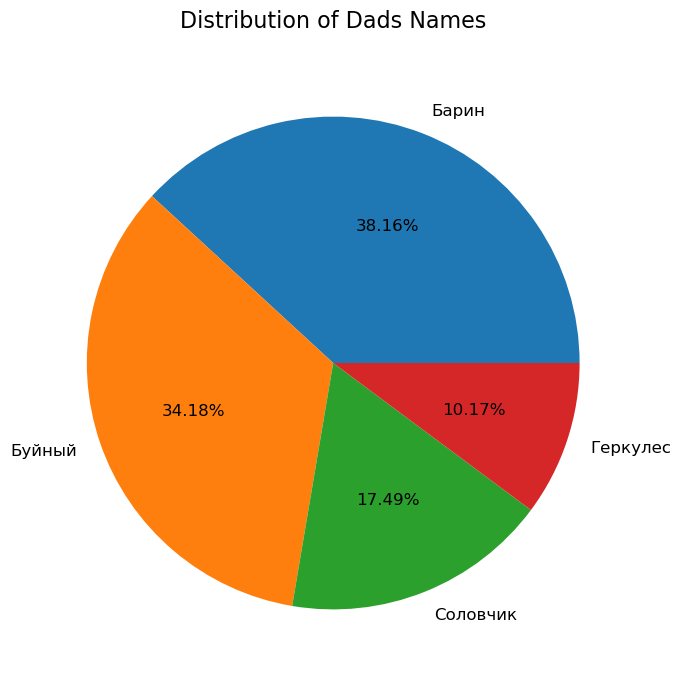

In [37]:
pivot_dads = pivot_data(ferma_dad, 'dads_name', 'id')
data_pie(pivot_dads, 'quantity', 'dads_name', 'Distribution of Dads Names')

## 4. Correlation Analysis
### 4.1. Quantitative Variables

In [38]:
data.select_dtypes(include=['number']).corr()

yield_kg       fcr  raw_protein_g  sugar_proteins      fats  \
yield_kg        1.000000  0.765098       0.446731        0.806339  0.600902   
fcr             0.765098  1.000000       0.387875        0.749007  0.637279   
raw_protein_g   0.446731  0.387875       1.000000        0.446332  0.357793   
sugar_proteins  0.806339  0.749007       0.446332        1.000000  0.629098   
fats            0.600902  0.637279       0.357793        0.629098  1.000000   
proteins        0.002966 -0.008939       0.226802        0.073718 -0.026542   

                proteins  
yield_kg        0.002966  
fcr            -0.008939  
raw_protein_g   0.226802  
sugar_proteins  0.073718  
fats           -0.026542  
proteins        1.000000

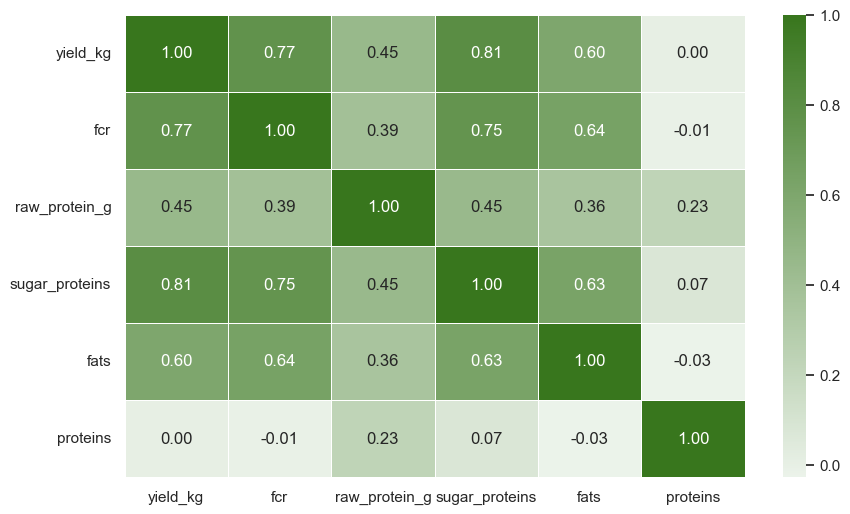

In [39]:
green_cmap = sns.light_palette("#38761d", as_cmap=True)
sns.set(rc={"figure.figsize": (10, 6)})
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f', cmap=green_cmap, linewidths=0.5)
plt.show()

In this table, we are primarily interested in the correlation of milk yield with other indicators, as yield is the target feature in this task.

**Milk Yield. High correlation:**
* Sugar-Protein Ratio (`sugar_proteins`) — 0.81
* Feed Conversion Ratio (`fcr`) — 0.77
* Fat Content (`fats`) — 0.6

**Milk Yield. Moderate correlation:**
* Raw Protein (`raw_protein_g`) — 0.45

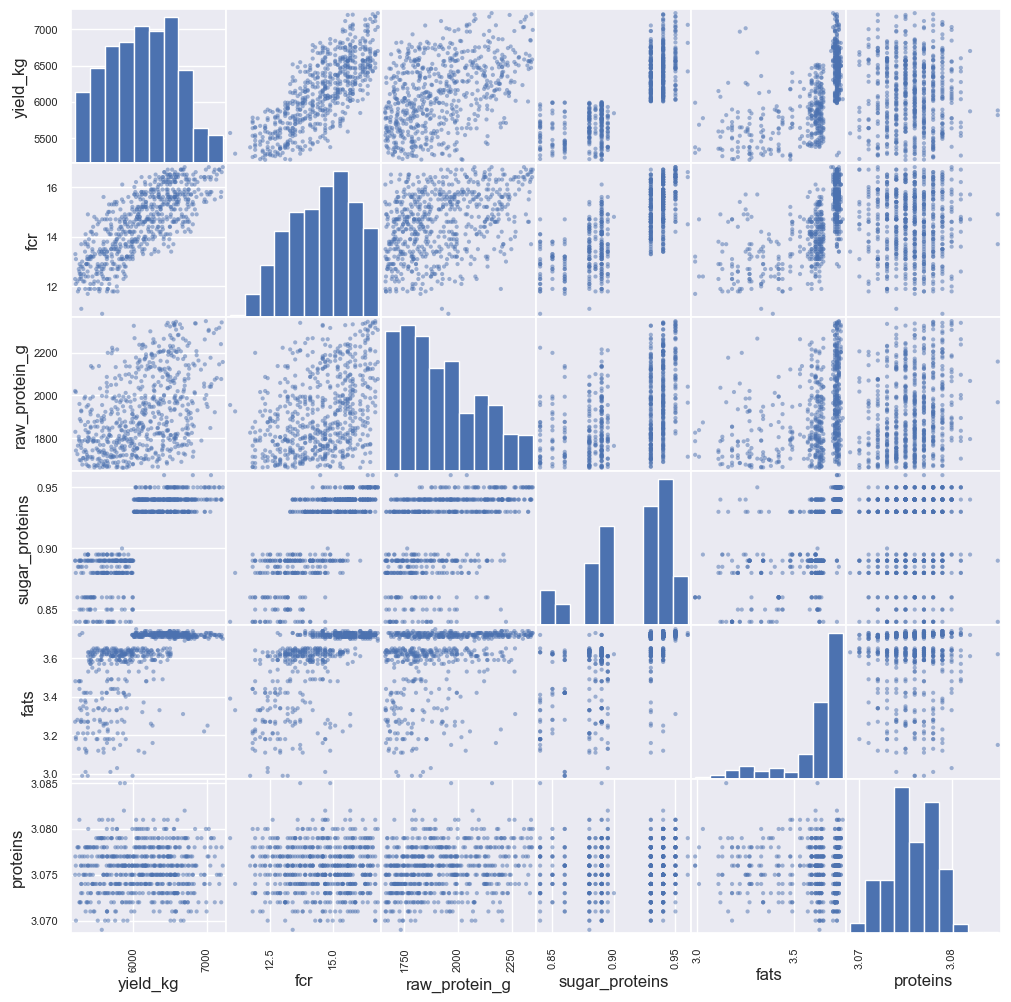

In [40]:
pd.plotting.scatter_matrix(data.drop('id', axis=1), figsize=(12, 12))
plt.show()

The scatter plot matrix demonstrates nonlinear relationships between some indicators, for example:
* Milk Yield and Sugar-Protein Ratio (yield_kg × sugar_proteins)
* Milk Yield and Feed Conversion Ratio (yield_kg × fcr)

### 4.2. Categorical Variables
To assess the degree of correlation, we will create a scatter plot for each categorical variable:
* grassland_type
* breed
* dads_breed
* age

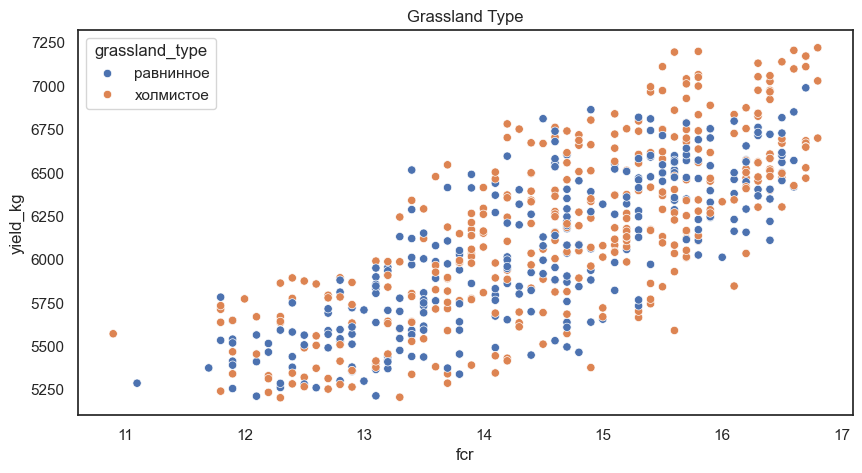

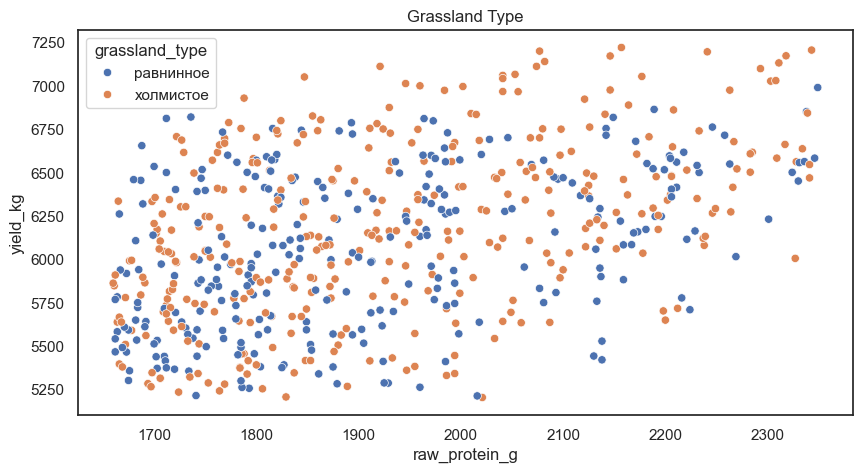

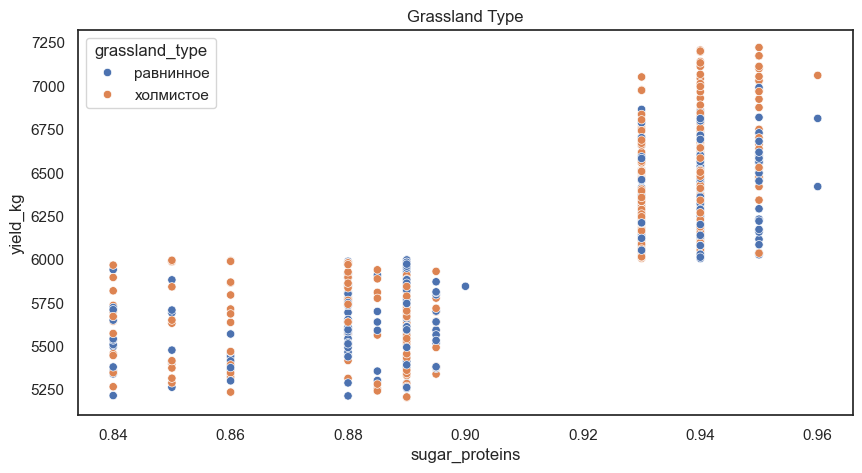

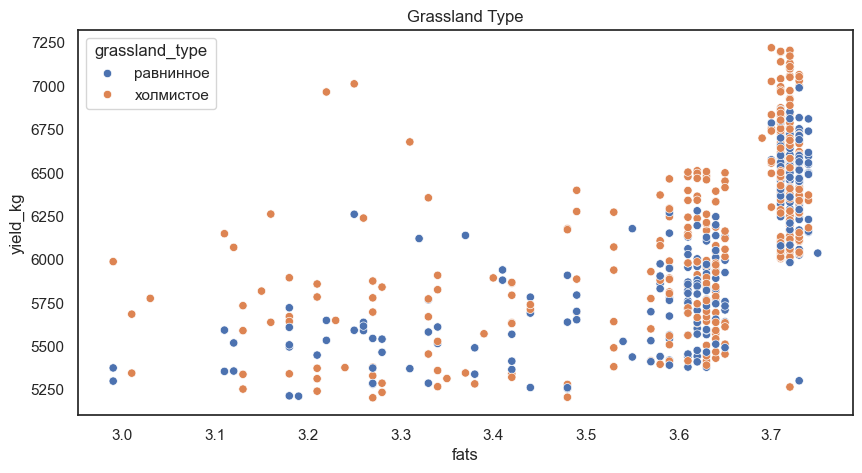

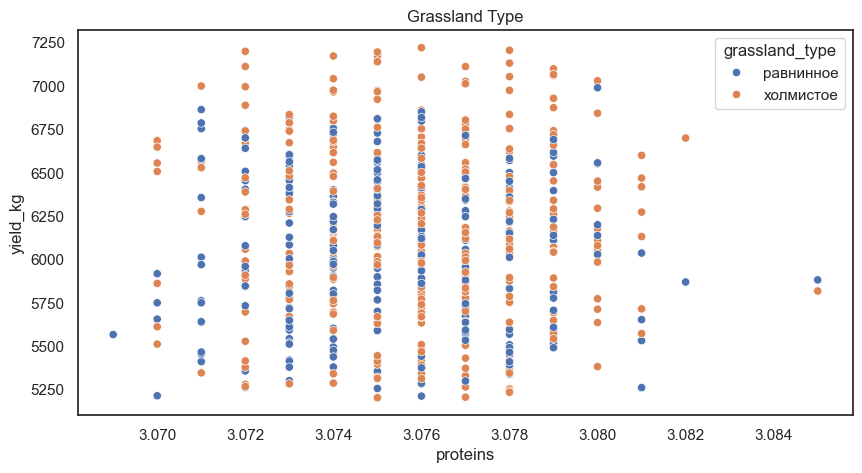

In [43]:
numeric_columns = ['fcr', 'raw_protein_g', 'sugar_proteins', 'fats', 'proteins']
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white')

for i in numeric_columns:
    sns.scatterplot(data=data, x=i, y='yield_kg', hue='grassland_type')
    plt.title('Grassland Type')
    plt.show()


The correlation is weak: the type of grassland does not have a noticeable impact on the target variable Yield (yield_kg).

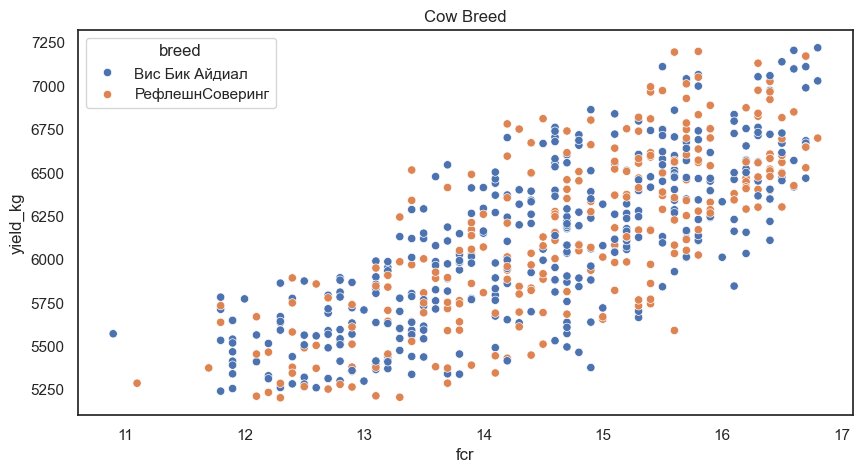

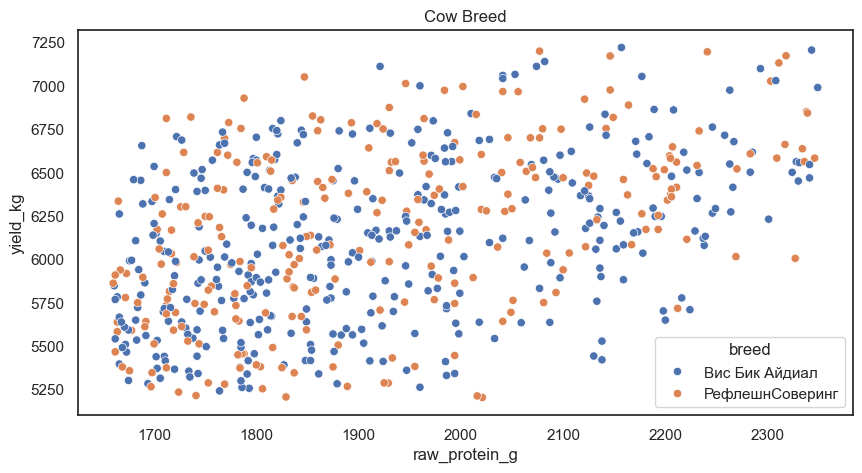

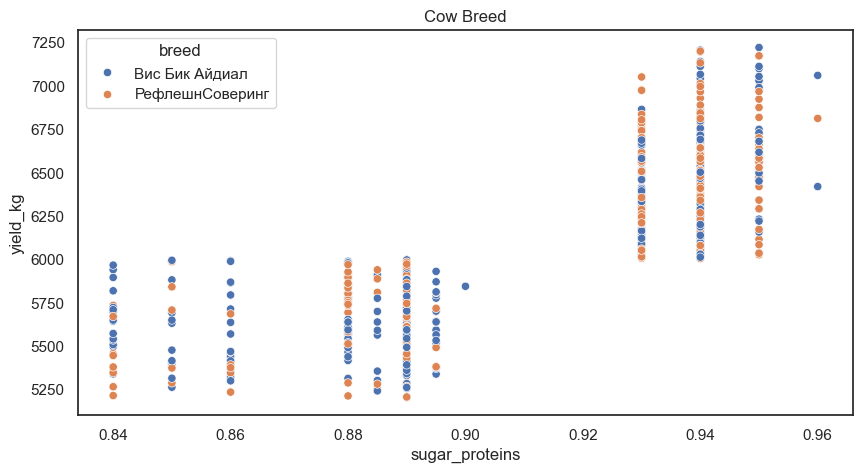

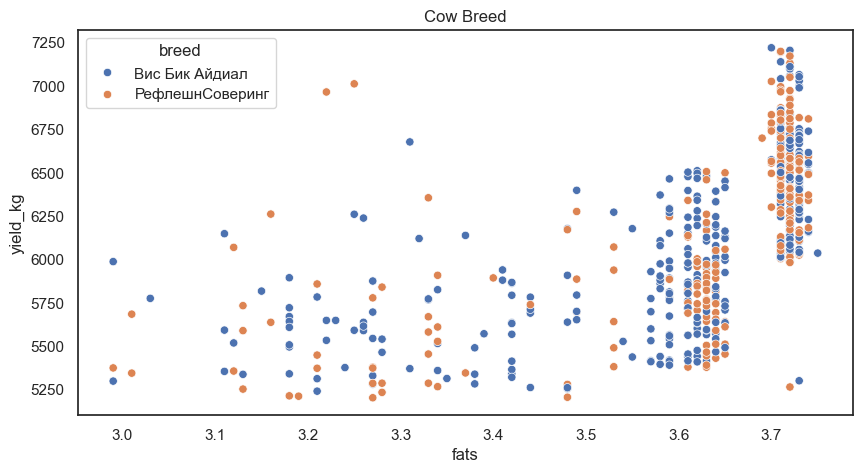

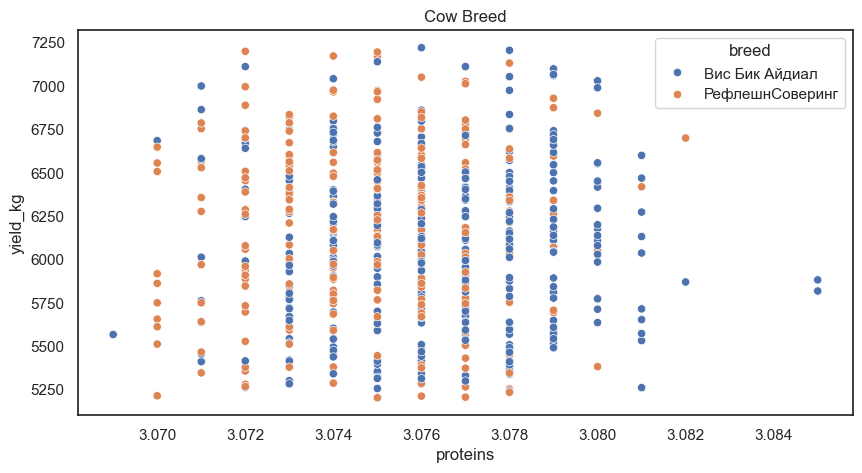

In [44]:
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white')

for i in numeric_columns:
    sns.scatterplot(data=data, x=i, y='yield_kg', hue='breed')
    plt.title('Cow Breed')
    plt.show()

The correlation is weak: the cow breed does not have a noticeable impact on the target variable Yield (yield_kg).

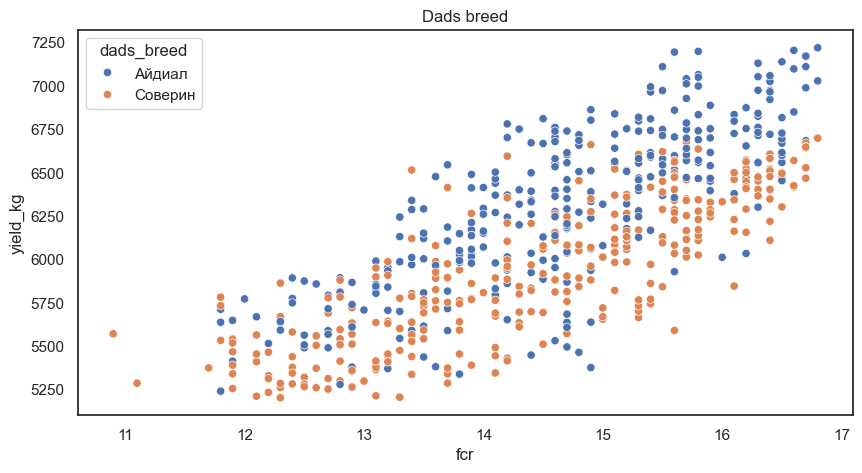

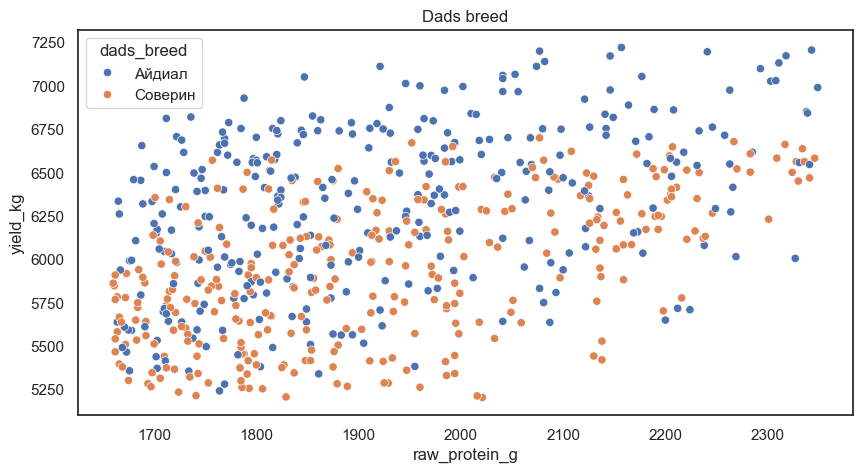

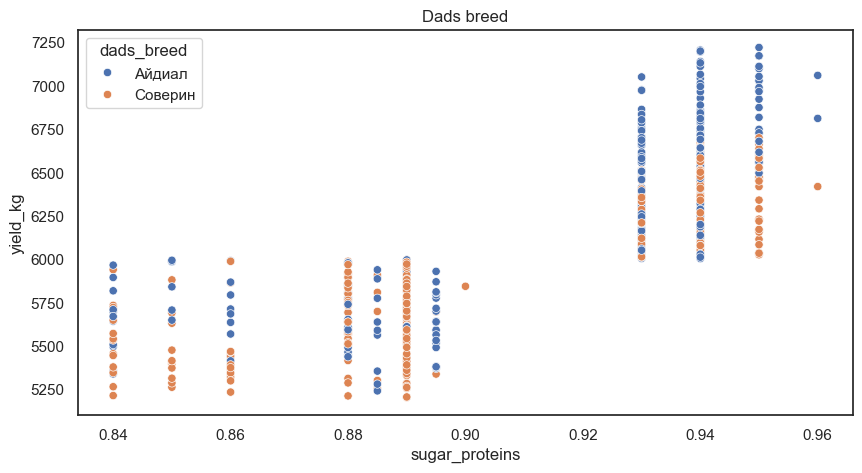

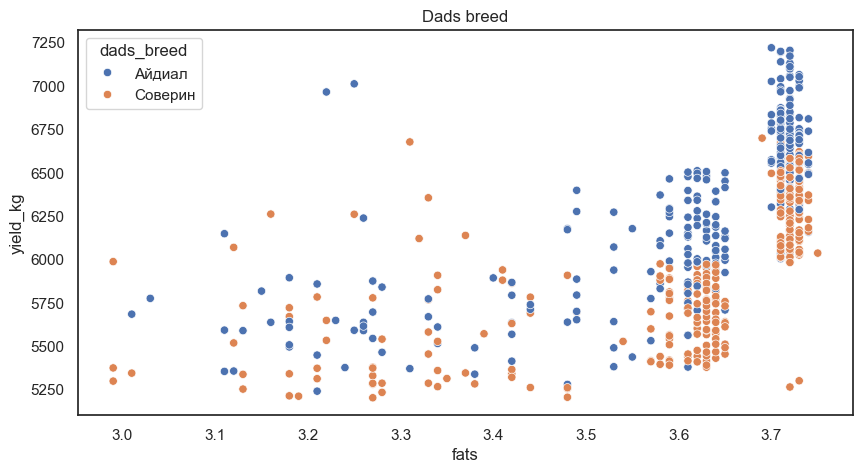

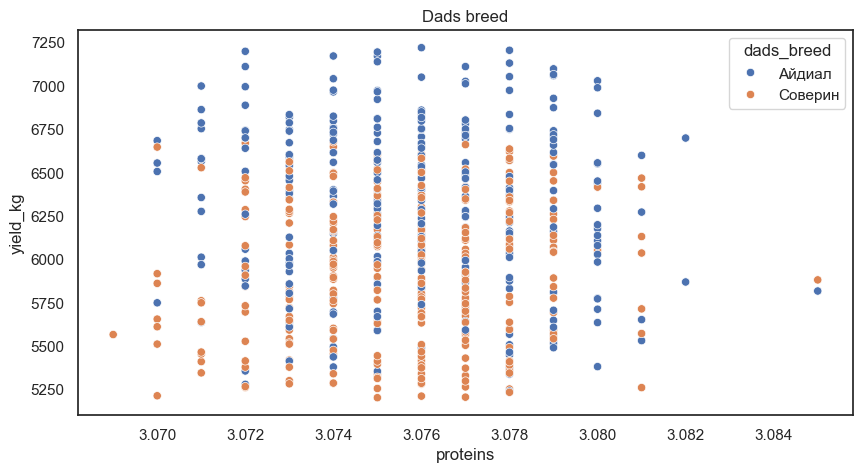

In [45]:
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white')

for i in numeric_columns:
    sns.scatterplot(data=data, x=i, y='yield_kg', hue='dads_breed')
    plt.title('Dads breed')
    plt.show()

The correlation is moderate: the sire's breed influences the target variable Yield (yield_kg), with cows sired by bulls of the Ideal breed producing a higher yield.

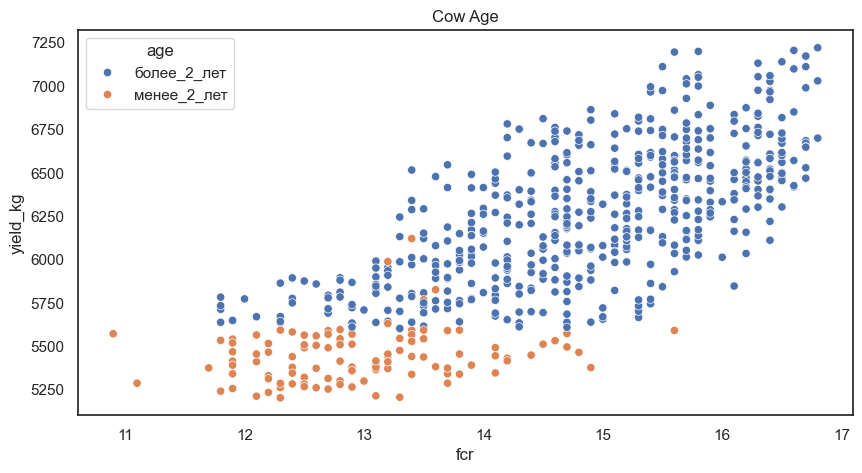

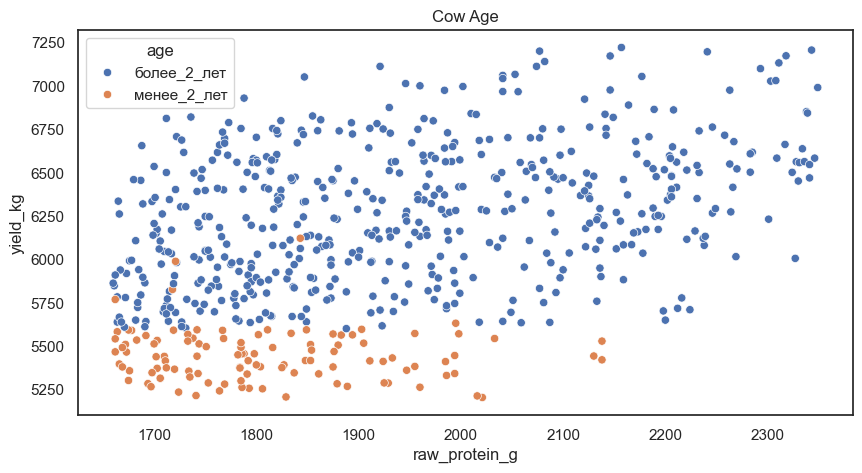

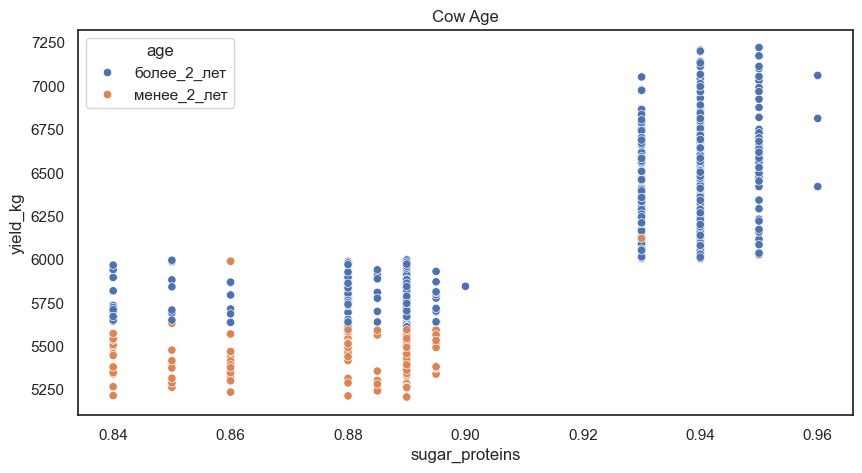

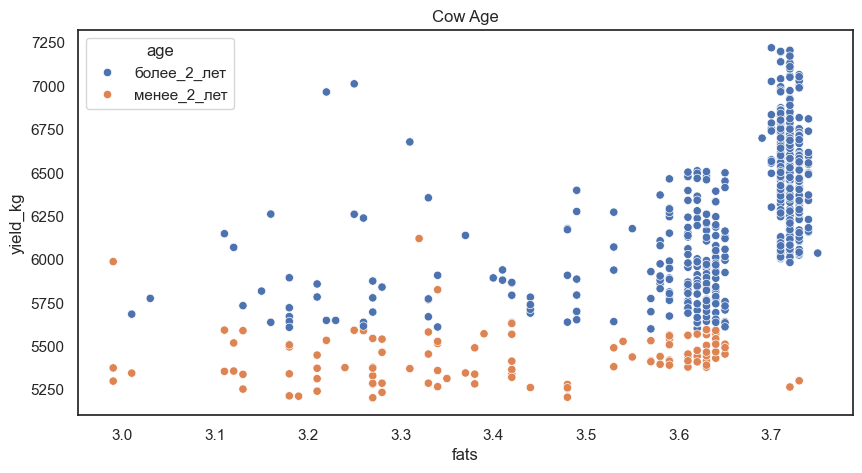

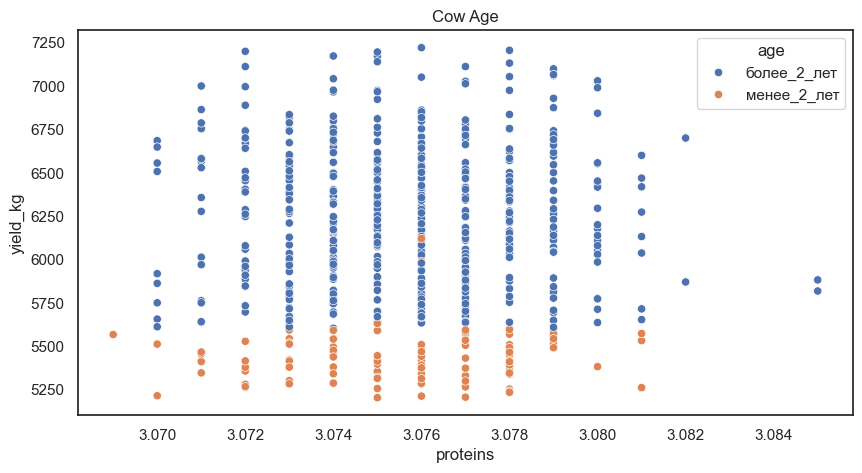

In [46]:
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white')

for i in numeric_columns:
    sns.scatterplot(data=data, x=i, y='yield_kg', hue='age')
    plt.title('Cow Age')
    plt.show()

The correlation is strong: age has a significant impact on the target variable Yield (yield_kg), with cows older than 2 years producing a higher yield.

**Summary**  
A correlation has been identified between the target variable Yield (yield_kg) and quantitative variables:

High correlation:
* Sugar-protein ratio (sugar_proteins) — 0.81
* Feed nutritional value (fcr) — 0.77
* Fat content (fats) — 0.6

Moderate correlation:
* Raw protein (raw_protein_g) — 0.45

Additionally, Yield (yield_kg) shows a strong correlation with the categorical variable Age (age) and a moderate correlation with the categorical variable Sire's breed (dads_breed).

## 5. Training the Linear Regression Model
### 5.1. First Linear Regression Model

In [47]:
data.head()

id  yield_kg   fcr  raw_protein_g  sugar_proteins            breed  \
0  1      5863  14.2           1743           0.890   Вис Бик Айдиал   
1  2      5529  12.8           2138           0.890   Вис Бик Айдиал   
2  3      5810  14.0           1854           0.885  РефлешнСоверинг   
3  4      5895  12.4           2012           0.885  РефлешнСоверинг   
4  5      5302  12.8           1675           0.885   Вис Бик Айдиал   

  grassland_type dads_breed  fats  proteins      taste          age  
0      равнинное     Айдиал  3.58     3.076     вкусно  более_2_лет  
1      равнинное    Соверин  3.54     3.079     вкусно  менее_2_лет  
2      холмистое    Соверин  3.59     3.074  не вкусно  более_2_лет  
3      холмистое     Айдиал  3.40     3.075  не вкусно  более_2_лет  
4      равнинное    Соверин  3.73     3.073     вкусно  менее_2_лет

In [48]:
X = data[['fcr', 'raw_protein_g', 'sugar_proteins', 'breed', 'grassland_type', 'age', 'dads_breed']]

y = data['yield_kg']

In [49]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 7)
(157, 7)
(471,)
(157,)


Before training the model, we will perform feature standardization and scaling.  
First, we will scale the numerical features using `StandardScaler`:

In [50]:
scaler = StandardScaler()
numeric_columns = ['fcr', 'raw_protein_g', 'sugar_proteins']
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

We will format the standardized features into dataframes and mark them as scaled.
Later, we will return to these tables to assemble the complete dataset for training the model.

In [51]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

encode categorical features using `OneHotEncoder`.

In [52]:
encoder = OneHotEncoder(drop='first', sparse=False)
category_columns = ['breed', 'grassland_type', 'age', 'dads_breed']
X_train_ohe = encoder.fit_transform(X_train[category_columns])
X_test_ohe = encoder.transform(X_test[category_columns])

encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

array(['breed_РефлешнСоверинг', 'grassland_type_холмистое',
       'age_менее_2_лет', 'dads_breed_Соверин'], dtype=object)

In [53]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [54]:
X_train = pd.concat((X_train_ohe, X_train_scaled), axis=1)
X_test = pd.concat((X_test_ohe, X_test_scaled), axis=1)

In [55]:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions_1 = model_lr_1.predict(X_test)

r2_1 = r2_score(y_test, predictions_1)
print("R2 LinearRegression:", r2_1)

R2 LinearRegression: 0.7844078173416966


In 78% of cases, the model's prediction is closer to the truth than the mean value of the target variable.
Now, let's analyze the model residuals.

Text(0.5, 1.0, 'Scatter Plot')

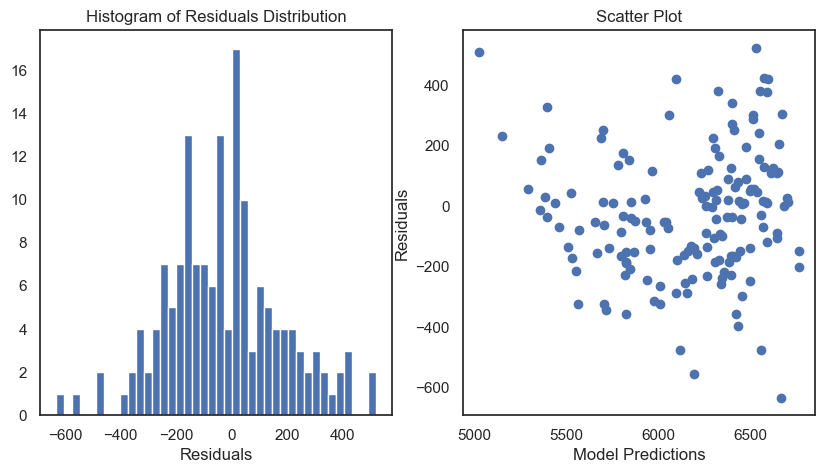

In [56]:
residuals = y_test - predictions_1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=40)
axes[0].set_title('Histogram of Residuals Distribution')
axes[0].set_xlabel('Residuals')

axes[1].scatter(x=predictions_1, y=residuals)
axes[1].set_xlabel('Model Predictions')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Scatter Plot')

**Summary**  
The coefficient of determination is 78.4%, and the residuals follow a normal distribution with outliers.

### 5.2 Second Linear Regression Model
Earlier, in the scatter plot matrix, we identified a nonlinear relationship between the sugar-protein ratio (`sugar_proteins`) and milk yield (`yield_kg`). Visually, the values of sugar_proteins were grouped into two distinct clusters: below 0.9 and above 0.9.

Let's recall how the scatter plot looked:

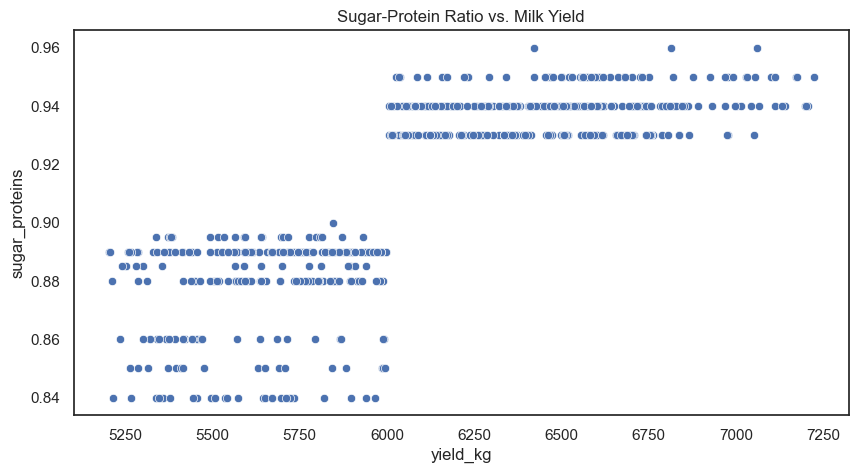

In [57]:
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white')
sns.scatterplot(data=data, x='yield_kg', y='sugar_proteins')
plt.title('Sugar-Protein Ratio vs. Milk Yield')
plt.show()

Add a new column, sugar_proteins_group, to the dataset and fill it with values based on the following condition:
* `СПО ⩽ 0.9` — if the sugar_proteins value is less than or equal to 0.9
* `СПО > 0.9` — if the sugar_proteins value is greater than 0.9

In [58]:
data['sugar_proteins_group'] = data['sugar_proteins'].apply(lambda x: 'СПО ⩽ 0.9' if x <= 0.90 else 'СПО > 0.9')
data

id  yield_kg   fcr  raw_protein_g  sugar_proteins            breed  \
0      1      5863  14.2           1743           0.890   Вис Бик Айдиал   
1      2      5529  12.8           2138           0.890   Вис Бик Айдиал   
2      3      5810  14.0           1854           0.885  РефлешнСоверинг   
3      4      5895  12.4           2012           0.885  РефлешнСоверинг   
4      5      5302  12.8           1675           0.885   Вис Бик Айдиал   
..   ...       ...   ...            ...             ...              ...   
624  625      6812  15.4           1964           0.940  РефлешнСоверинг   
625  626      5513  12.9           1700           0.880  РефлешнСоверинг   
626  627      5970  14.4           1837           0.880  РефлешнСоверинг   
627  628      5746  13.8           1994           0.890  РефлешнСоверинг   
628  629      6503  16.2           2283           0.940   Вис Бик Айдиал   

    grassland_type dads_breed  fats  proteins      taste          age  \
0        равнинное     Айдиал  3.58     3.076     вкусно  более_2_лет   
1        равнинное    Соверин  3.54     3.079     вкусно  менее_2_лет   
2        холмистое    Соверин  3.59     3.074  не вкусно  более_2_лет   
3        холмистое     Айдиал  3.40     3.075  не вкусно  более_2_лет   
4        равнинное    Соверин  3.73     3.073     вкусно  менее_2_лет   
..             ...        ...   ...       ...        ...          ...   
624      равнинное     Айдиал  3.74     3.075  не вкусно  более_2_лет   
625      равнинное    Соверин  3.64     3.073     вкусно  менее_2_лет   
626      холмистое    Соверин  3.64     3.075  не вкусно  более_2_лет   
627      равнинное    Соверин  3.64     3.077     вкусно  более_2_лет   
628      холмистое    Соверин  3.71     3.076     вкусно  более_2_лет   

    sugar_proteins_group  
0              СПО ⩽ 0.9  
1              СПО ⩽ 0.9  
2              СПО ⩽ 0.9  
3              СПО ⩽ 0.9  
4              СПО ⩽ 0.9  
..                   ...  
624            СПО > 0.9  
625            СПО ⩽ 0.9  
626            СПО ⩽ 0.9  
627            СПО ⩽ 0.9  
628            СПО > 0.9  

[628 rows x 13 columns]

Eliminate the nonlinearity of the `fcr` by squaring it, and add a new column `fcr_sq` to the dataset.

In [59]:
data['fcr_sq'] = data['fcr'] ** 2
data.head(10)

id  yield_kg   fcr  raw_protein_g  sugar_proteins            breed  \
0   1      5863  14.2           1743           0.890   Вис Бик Айдиал   
1   2      5529  12.8           2138           0.890   Вис Бик Айдиал   
2   3      5810  14.0           1854           0.885  РефлешнСоверинг   
3   4      5895  12.4           2012           0.885  РефлешнСоверинг   
4   5      5302  12.8           1675           0.885   Вис Бик Айдиал   
5   6      5254  12.7           1806           0.885  РефлешнСоверинг   
6   7      5910  13.2           1792           0.885   Вис Бик Айдиал   
7   8      6179  14.7           1806           0.930   Вис Бик Айдиал   
8   9      6783  14.2           1918           0.940  РефлешнСоверинг   
9  10      5339  13.4           1791           0.895   Вис Бик Айдиал   

  grassland_type dads_breed  fats  proteins      taste          age  \
0      равнинное     Айдиал  3.58     3.076     вкусно  более_2_лет   
1      равнинное    Соверин  3.54     3.079     вкусно  менее_2_лет   
2      холмистое    Соверин  3.59     3.074  не вкусно  более_2_лет   
3      холмистое     Айдиал  3.40     3.075  не вкусно  более_2_лет   
4      равнинное    Соверин  3.73     3.073     вкусно  менее_2_лет   
5      холмистое    Соверин  3.13     3.078     вкусно  менее_2_лет   
6      равнинное    Соверин  3.48     3.077     вкусно  более_2_лет   
7      равнинное     Айдиал  3.55     3.076     вкусно  более_2_лет   
8      холмистое     Айдиал  3.71     3.077     вкусно  более_2_лет   
9      холмистое    Соверин  3.13     3.075     вкусно  менее_2_лет   

  sugar_proteins_group  fcr_sq  
0            СПО ⩽ 0.9  201.64  
1            СПО ⩽ 0.9  163.84  
2            СПО ⩽ 0.9  196.00  
3            СПО ⩽ 0.9  153.76  
4            СПО ⩽ 0.9  163.84  
5            СПО ⩽ 0.9  161.29  
6            СПО ⩽ 0.9  174.24  
7            СПО > 0.9  216.09  
8            СПО > 0.9  201.64  
9            СПО ⩽ 0.9  179.56

In [60]:
X = data[['fcr_sq', 'raw_protein_g', 'sugar_proteins_group', 'breed', 'grassland_type', 'age', 'dads_breed']]
y = data['yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

numeric_columns = ['fcr_sq', 'raw_protein_g']
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

category_columns = ['sugar_proteins_group', 'breed', 'grassland_type', 'age', 'dads_breed']
X_train_ohe = encoder.fit_transform(X_train[category_columns])
X_test_ohe = encoder.transform(X_test[category_columns])

encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

(471, 7)
(157, 7)
(471,)
(157,)


array(['sugar_proteins_group_СПО ⩽ 0.9', 'breed_РефлешнСоверинг',
       'grassland_type_холмистое', 'age_менее_2_лет',
       'dads_breed_Соверин'], dtype=object)

In [61]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train = pd.concat((X_train_ohe, X_train_scaled), axis=1)
X_test = pd.concat((X_test_ohe, X_test_scaled), axis=1)

model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions_2 = model_lr_2.predict(X_test)

r2_2 = r2_score(y_test, predictions_2)
print("R2 LinearRegression:", r2_2)

R2 LinearRegression: 0.8180879926867501


In 81.8% of cases, the model's prediction is closer to the truth than the mean value of the target variable. Now, let's analyze the model residuals.

Text(0.5, 1.0, 'Scatter Plot')

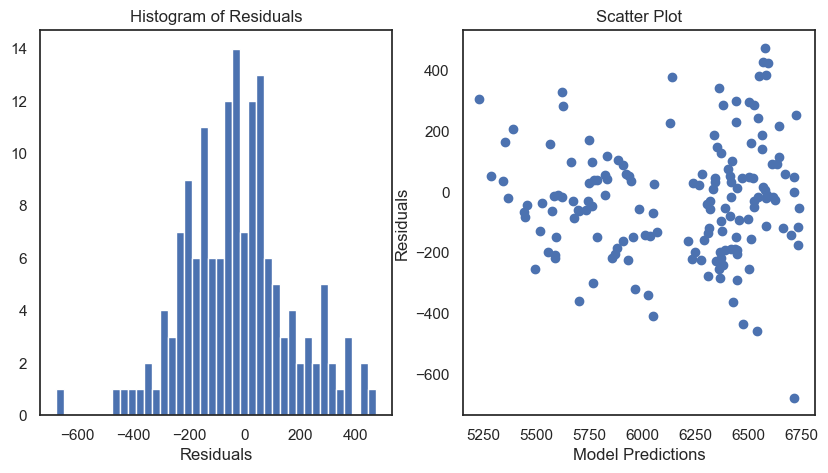

In [62]:
residuals = y_test - predictions_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].hist(residuals, bins=40)
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')

axes[1].scatter(x=predictions_2, y=residuals)
axes[1].set_xlabel('Model Predictions')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Scatter Plot')

**Summary**  
The coefficient of determination is 81.8%. The residuals exhibit an asymmetric normal distribution skewed to the left, meaning the model's predicted values are generally higher than the actual values. However, the second model has shown better results, suggesting that addressing nonlinearity has been beneficial.

### 5.3. Third Linear Regression Model

In [63]:
data_full = data.merge(ferma_dad, on='id', how='left')
data_full.head()

id  yield_kg   fcr  raw_protein_g  sugar_proteins            breed  \
0   1      5863  14.2           1743           0.890   Вис Бик Айдиал   
1   2      5529  12.8           2138           0.890   Вис Бик Айдиал   
2   3      5810  14.0           1854           0.885  РефлешнСоверинг   
3   4      5895  12.4           2012           0.885  РефлешнСоверинг   
4   5      5302  12.8           1675           0.885   Вис Бик Айдиал   

  grassland_type dads_breed  fats  proteins      taste          age  \
0      равнинное     Айдиал  3.58     3.076     вкусно  более_2_лет   
1      равнинное    Соверин  3.54     3.079     вкусно  менее_2_лет   
2      холмистое    Соверин  3.59     3.074  не вкусно  более_2_лет   
3      холмистое     Айдиал  3.40     3.075  не вкусно  более_2_лет   
4      равнинное    Соверин  3.73     3.073     вкусно  менее_2_лет   

  sugar_proteins_group  fcr_sq dads_name  
0            СПО ⩽ 0.9  201.64    Буйный  
1            СПО ⩽ 0.9  163.84  Соловчик  
2            СПО ⩽ 0.9  196.00     Барин  
3            СПО ⩽ 0.9  153.76    Буйный  
4            СПО ⩽ 0.9  163.84     Барин

In [64]:
X = data_full[['raw_protein_g', 'sugar_proteins_group', 'breed', 'grassland_type', 'age', 'dads_breed', 'dads_name', 'fcr_sq']]
y = data['yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 8)
(157, 8)
(471,)
(157,)


In [65]:
numeric_columns = ['fcr_sq', 'raw_protein_g']
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

category_columns = ['sugar_proteins_group', 'breed', 'grassland_type', 'age', 'dads_breed', 'dads_name']
X_train_ohe = encoder.fit_transform(X_train[category_columns])
X_test_ohe = encoder.transform(X_test[category_columns])

encoder_col_names = encoder.get_feature_names_out()
encoder_col_names

array(['sugar_proteins_group_СПО ⩽ 0.9', 'breed_РефлешнСоверинг',
       'grassland_type_холмистое', 'age_менее_2_лет',
       'dads_breed_Соверин', 'dads_name_Буйный', 'dads_name_Геркулес',
       'dads_name_Соловчик'], dtype=object)

In [67]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

pd.concat((X_train_ohe, X_train_scaled), axis=1)
X_train = pd.concat((X_train_ohe, X_train_scaled), axis=1)
X_test = pd.concat((X_test_ohe, X_test_scaled), axis=1)

In [68]:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)

r2_3 = r2_score(y_test, predictions_3)
print("R2 LinearRegression:", r2_3)

R2 LinearRegression: 0.8247542745210404


In 82.5% of cases, the model's prediction is closer to the true value than the mean of the target variable. Now, let's analyze the model residuals.

Text(0.5, 1.0, 'Scatter Plot')

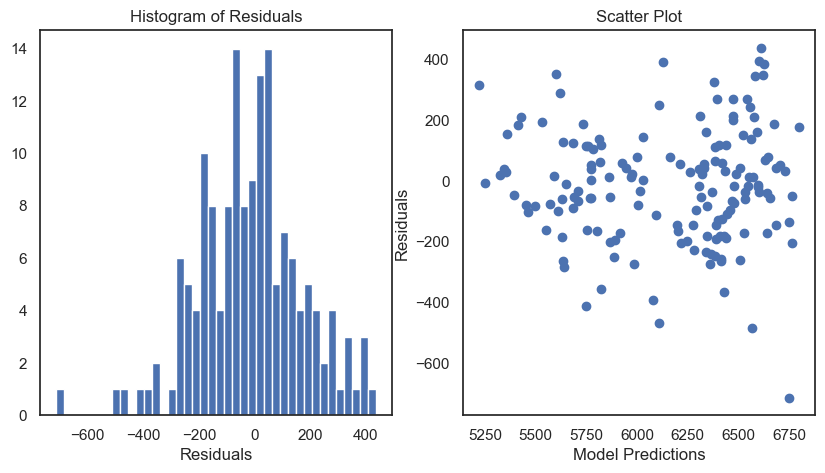

In [69]:
residuals = y_test - predictions_3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=40)
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')

axes[1].scatter(x=predictions_3, y=residuals)
axes[1].set_xlabel('Model Predictions')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Scatter Plot')

**Summary**  
The coefficient of determination is 82.5%. Similar to the second model, the residuals exhibit an asymmetric normal distribution with a leftward skew. However, the third model has demonstrated the best results:

* First model: R² = 0.784
* Second model: R² = 0.818
* Third model: R² = 0.825

### 5.4. Applying Metrics to Evaluate Model Accuracy
To assess accuracy, we will use the MSE, MAE, and RMSE metrics.

In [70]:
# Calculate metrics for the first model
mse_1 = mean_squared_error(y_test, predictions_1)
rmse_1 = mean_squared_error(y_test, predictions_1, squared=False)
mae_1 = mean_absolute_error(y_test, predictions_1)

# Calculate metrics for the second model
mse_2 = mean_squared_error(y_test, predictions_2)
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
mae_2 = mean_absolute_error(y_test, predictions_2)

# Calculate metrics for the third model
mse_3 = mean_squared_error(y_test, predictions_3)
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)
mae_3 = mean_absolute_error(y_test, predictions_3)

print(f"MSE, Mean Squared Error \n"
      f"Model 1: {mse_1} \n"
      f"Model 2: {mse_2} \n"
      f"Model 3: {mse_3} \n\n"
      f"RMSE, Root Mean Squared Error \n"
      f"Model 1: {rmse_1} \n"
      f"Model 2: {rmse_2} \n"
      f"Model 3: {rmse_3} \n\n"
      f"MAE, Mean Absolute Error \n"
      f"Model 1: {mae_1} \n"
      f"Model 2: {mae_2} \n"
      f"Model 3: {mae_3} \n"     
     )

MSE, Mean Squared Error 
Model 1: 43887.01500966052 
Model 2: 37030.91131113696 
Model 3: 35673.889886181976 

RMSE, Root Mean Squared Error 
Model 1: 209.49227911706083 
Model 2: 192.43417396901455 
Model 3: 188.8753289505593 

MAE, Mean Absolute Error 
Model 1: 164.24194463474933 
Model 2: 149.03965222364607 
Model 3: 146.16302445362322 



The third model demonstrates the best performance among all models.

### 5.5. Determining the Confidence Interval
Before applying the model to the customer's data, we will determine the confidence interval of the prediction.
First, let's calculate the model errors:

In [71]:
errors = predictions_3 - np.array(y_test)

In [72]:
alpha = 0.05
lower_quantile = np.quantile(errors, alpha / 2)
upper_quantile = np.quantile(errors, 1 - alpha / 2)

mean_prediction = np.mean(predictions_3)
lower_bound = mean_prediction + lower_quantile
upper_bound = mean_prediction + upper_quantile

print(f'Confidence interval of the prediction: [{lower_bound}, {upper_bound}]')

Confidence interval of the prediction: [5800.920421762215, 6549.957210035348]


### 5.6. Predicting Cow Milk Yield
Before applying the model to the customer's dataset, let's recall what data it contains:

In [73]:
cow_buy.head()

breed grassland_type dads_breed dads_name  fats  proteins  \
0   Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
1   Вис Бик Айдиал      равнинное    Соверин    Буйный  3.54     3.081   
2  РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
3  РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.061   
4  РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   

           age  
0  более_2_лет  
1  менее_2_лет  
2  более_2_лет  
3  более_2_лет  
4  более_2_лет

To run the model, we need to add information about FCR (fcr), raw protein content (raw_protein_g), and sugar-protein ratio (sugar_proteins) to the dataset. We will use the average values from the customer's main dataset.

In [74]:
cow_buy_full = cow_buy

cow_buy_full['fcr'] = data_full['fcr'].mean() * 1.05
cow_buy_full['raw_protein_g'] = data_full['raw_protein_g'].mean() * 1.05
cow_buy_full['sugar_proteins'] = data_full['sugar_proteins'].mean() * 1.05
cow_buy_full['fcr_sq'] = cow_buy_full['fcr'] ** 2
cow_buy_full['sugar_proteins_group'] = cow_buy_full['sugar_proteins'].apply(lambda x: 'СПО ⩽ 0.9' if x <= 0.90 else 'СПО > 0.9')

print(cow_buy_full.shape)
cow_buy_full.head()

(20, 12)


breed grassland_type dads_breed dads_name  fats  proteins  \
0   Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
1   Вис Бик Айдиал      равнинное    Соверин    Буйный  3.54     3.081   
2  РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
3  РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.061   
4  РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   

           age        fcr  raw_protein_g  sugar_proteins      fcr_sq  \
0  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
1  менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
2  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
3  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
4  более_2_лет  15.276162    2019.947532        0.958744  233.361138   

  sugar_proteins_group  
0            СПО > 0.9  
1            СПО > 0.9  
2            СПО > 0.9  
3            СПО > 0.9  
4            СПО > 0.9

In [75]:
# Scaling numerical features:
numeric_columns = ['fcr_sq', 'raw_protein_g']

cow_buy_scaled = scaler.transform(cow_buy_full[numeric_columns])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=numeric_columns)

# Encoding categorical features:
category_columns = ['sugar_proteins_group', 'breed', 'grassland_type', 'age', 'dads_breed', 'dads_name']
cow_buy_ohe = encoder.transform(cow_buy_full[category_columns])
coded_columns = encoder.get_feature_names_out()
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=coded_columns)

cow_buy_coded = pd.concat((cow_buy_ohe, cow_buy_scaled), axis=1)

cow_buy_full['yield_kg'] = model_lr_3.predict(cow_buy_coded)
cow_buy_full

breed grassland_type dads_breed dads_name  fats  proteins  \
0    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
1    Вис Бик Айдиал      равнинное    Соверин    Буйный  3.54     3.081   
2   РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
3   РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.061   
4   РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   
5   РефлешнСоверинг      равнинное    Соверин  Геркулес  3.63     3.053   
6    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
7    Вис Бик Айдиал      равнинное    Соверин    Буйный  3.57     3.079   
8   РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
9   РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.079   
10   Вис Бик Айдиал      холмистое    Соверин  Соловчик  3.73     3.055   
11  РефлешнСоверинг      равнинное    Соверин  Геркулес  3.73     3.073   
12   Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.68     3.046   
13   Вис Бик Айдиал      холмистое    Соверин     Барин  3.42     3.075   
14  РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
15  РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.065   
16   Вис Бик Айдиал      холмистое    Соверин  Соловчик  3.73     3.079   
17  РефлешнСоверинг      равнинное    Соверин  Геркулес  3.77     3.053   
18   Вис Бик Айдиал      равнинное    Соверин    Буйный  3.34     3.069   
19  РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   

            age        fcr  raw_protein_g  sugar_proteins      fcr_sq  \
0   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
1   менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
2   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
3   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
4   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
5   менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
6   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
7   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
8   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
9   менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
10  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
11  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
12  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
13  менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
14  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
15  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
16  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
17  менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
18  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
19  более_2_лет  15.276162    2019.947532        0.958744  233.361138   

   sugar_proteins_group     yield_kg  
0             СПО > 0.9  6609.919297  
1             СПО > 0.9  6378.711028  
2             СПО > 0.9  6283.999775  
3             СПО > 0.9  6593.089377  
4             СПО > 0.9  6542.146066  
5             СПО > 0.9  6425.380218  
6             СПО > 0.9  6609.919297  
7             СПО > 0.9  6571.259737  
8             СПО > 0.9  6283.999775  
9             СПО > 0.9  6400.540668  
10            СПО > 0.9  6344.707860  
11            СПО > 0.9  6617.928926  
12            СПО > 0.9  6609.919297  
13            СПО > 0.9  6127.474742  
14            СПО > 0.9  6283.999775  
15            СПО > 0.9  6593.089377  
16            СПО > 0.9  6344.707860  
17            СПО > 0.9  6425.380218  
18            СПО > 0.9  6571.259737  
19            СПО > 0.9  6542.146066

We have predicted the milk yields of the seller's cows: all twenty observations show satisfactory yield levels. Now, we need to predict which of these cows produce tasty milk.

## 6. Training a Logistic Regression Model
To predict milk taste, we will use logistic regression. The target variable (milk taste) is influenced by feed quality, cow breed, age, and, of course, the composition of the milk itself.

In [76]:
X = data_full[['breed', 'grassland_type', 'fats', 'proteins', 'age', 'raw_protein_g', 'sugar_proteins_group', 'fcr_sq']]

y = data_full['taste']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
# Encode the target variable Taste
y_train = y_train.map({'вкусно': 1, 'не вкусно': 0}).astype(int)
y_test = y_test.map({'вкусно': 1, 'не вкусно': 0}).astype(int)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 8)
(157, 8)
(471,)
(157,)


In [77]:
# Scaling numerical features:
numeric_columns = ['fcr_sq', 'raw_protein_g', 'fats', 'proteins']
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

# Encoding categorical features:
category_columns = ['sugar_proteins_group', 'grassland_type', 'age']
X_train_ohe = encoder.fit_transform(X_train[category_columns])
X_test_ohe = encoder.transform(X_test[category_columns])
coded_columns = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=coded_columns)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=coded_columns)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Training the logistic regression model on the obtained data:

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# examine the coefficients of the input features:
for feature_number, feature_name in enumerate(X_train.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.4f}")

sugar_proteins_group_СПО ⩽ 0.9: +1.9859
grassland_type_холмистое: +1.7076
age_менее_2_лет     : +0.7886
fcr_sq              : +1.8297
raw_protein_g       : +1.1530
fats                : +0.9693
proteins            : +1.2946


The biggest influence on the taste of milk comes from the cow's age and the fat content of the product.
Let's evaluate the model's performance using the main metrics: accuracy, recall, and precision.

In [78]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"accuracy:  {round(accuracy, 4)} \n"
      f"precision: {round(precision, 4)} \n"
      f"recall:    {round(recall, 4)} \n"
     )

accuracy:  0.6369 
precision: 0.6281 
recall:    0.8636 



Our model provides an accurate prediction in 63.7% of cases.
Let's visualize the model's accuracy using a confusion matrix.

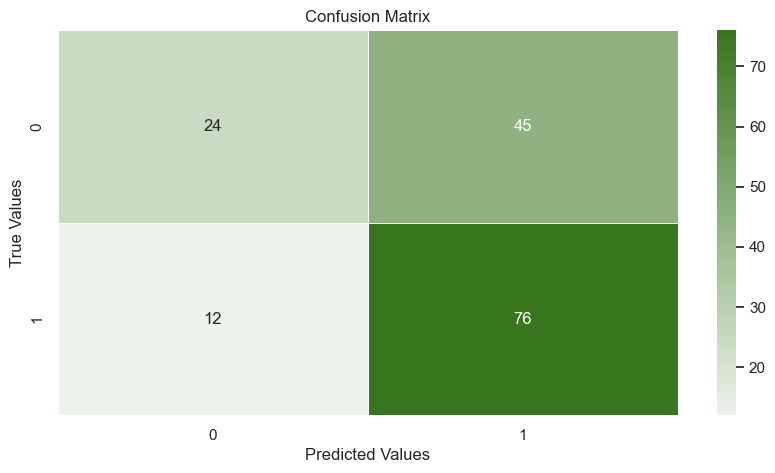

In [79]:
m = confusion_matrix(y_test, y_pred)
green_cmap = sns.light_palette("#38761d", as_cmap=True)
sns.heatmap(m, annot=True, fmt='d', cmap=green_cmap, linewidths=0.5)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

* In 100 cases, the model provides a correct prediction.
* In 12 cases, tasty milk (1) is classified as non-tasty (0) – Type II error.
* In 45 cases, non-tasty milk (0) is incorrectly classified as tasty (1) – Type I error.

The client intends to purchase cows that produce tasty milk. Therefore, it is necessary to reduce the number of Type I errors, meaning we should focus on improving the precision metric.

In [80]:
thresholds = [round(i,2) for i in np.linspace(0, 1, num = 4, endpoint=False)]
thresholds

[0.0, 0.25, 0.5, 0.75]

In [81]:
y_proba = clf.predict_proba(X_test)[:,1]
data_thresholds = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data_thresholds['y_pred_'+str(i)] = data_thresholds['y_proba'].apply(lambda x: 1 if x >= i else 0)

display(data_thresholds.head(10))

for i in thresholds:
    print(f"y_pred_{i} Recall: {recall_score(data_thresholds['y_valid'], data_thresholds[f'y_pred_{i}'])} \n"
          f"y_pred_{i} Precision: {precision_score(data_thresholds['y_valid'], data_thresholds[f'y_pred_{i}'])} \n \n"
         )

y_valid   y_proba  y_pred_0.0  y_pred_0.25  y_pred_0.5  y_pred_0.75
0        1  0.671155           1            1           1            0
1        1  0.741357           1            1           1            0
2        1  0.621610           1            1           1            0
3        0  0.421845           1            1           0            0
4        1  0.784057           1            1           1            1
5        0  0.532490           1            1           1            0
6        1  0.674993           1            1           1            0
7        1  0.666889           1            1           1            0
8        1  0.800284           1            1           1            1
9        0  0.552486           1            1           1            0

y_pred_0.0 Recall: 1.0 
y_pred_0.0 Precision: 0.5605095541401274 
 

y_pred_0.25 Recall: 1.0 
y_pred_0.25 Precision: 0.5641025641025641 
 

y_pred_0.5 Recall: 0.8636363636363636 
y_pred_0.5 Precision: 0.628099173553719 
 

y_pred_0.75 Recall: 0.23863636363636365 
y_pred_0.75 Precision: 0.875 
 



At threshold values below 0.5, the model predicts non-tasty milk as tasty.  
Let's try increasing the threshold while considering a wider range of threshold values.

In [82]:
thresholds = [round(i,2) for i in np.linspace(0.5, 1, num = 6, endpoint=False)]
thresholds

[0.5, 0.58, 0.67, 0.75, 0.83, 0.92]

In [83]:
y_proba = clf.predict_proba(X_test)[:,1]
data_thresholds = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data_thresholds['y_pred_'+str(i)] = data_thresholds['y_proba'].apply(lambda x: 1 if x >= i else 0)

display(data_thresholds.head(10))

for i in thresholds:
    print(f"y_pred_{i} Recall: {recall_score(data_thresholds['y_valid'], data_thresholds[f'y_pred_{i}'])} \n"
          f"y_pred_{i} Precision: {precision_score(data_thresholds['y_valid'], data_thresholds[f'y_pred_{i}'])} \n \n"
         )

y_valid   y_proba  y_pred_0.5  y_pred_0.58  y_pred_0.67  y_pred_0.75  \
0        1  0.671155           1            1            1            0   
1        1  0.741357           1            1            1            0   
2        1  0.621610           1            1            0            0   
3        0  0.421845           0            0            0            0   
4        1  0.784057           1            1            1            1   
5        0  0.532490           1            0            0            0   
6        1  0.674993           1            1            1            0   
7        1  0.666889           1            1            0            0   
8        1  0.800284           1            1            1            1   
9        0  0.552486           1            0            0            0   

   y_pred_0.83  y_pred_0.92  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  
5            0            0  
6            0            0  
7            0            0  
8            0            0  
9            0            0

y_pred_0.5 Recall: 0.8636363636363636 
y_pred_0.5 Precision: 0.628099173553719 
 

y_pred_0.58 Recall: 0.8068181818181818 
y_pred_0.58 Precision: 0.7029702970297029 
 

y_pred_0.67 Recall: 0.4772727272727273 
y_pred_0.67 Precision: 0.7777777777777778 
 

y_pred_0.75 Recall: 0.23863636363636365 
y_pred_0.75 Precision: 0.875 
 

y_pred_0.83 Recall: 0.03409090909090909 
y_pred_0.83 Precision: 1.0 
 

y_pred_0.92 Recall: 0.0 
y_pred_0.92 Precision: 0.0 
 



C:\Users\JPB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Type I error was minimized at threshold = 0.83.

In [84]:
y_pred_new = (clf.predict_proba(X_test)[:, 1] >= 0.83).astype(int) 
accuracy = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
print('accuracy: ', round(accuracy, 2))
print('precision:', round(precision, 2))
print('recall:   ', round(recall, 2))

accuracy:  0.46
precision: 1.0
recall:    0.03


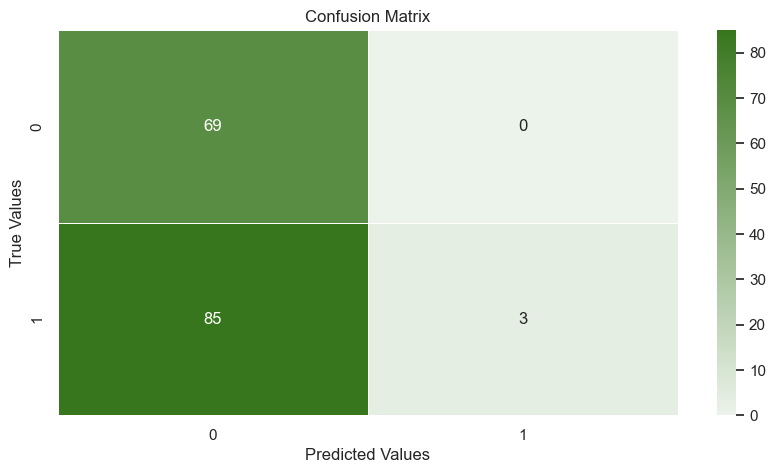

In [85]:
m = confusion_matrix(y_test, y_pred_new)
green_cmap = sns.light_palette("#38761d", as_cmap=True)
sns.heatmap(m, annot=True, fmt='d', cmap=green_cmap, linewidths=0.5)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

Working on the precision metric negatively impacted the overall accuracy of the model: 100 correct predictions in the first case versus 69 correct predictions now.

Let's build a model for the dataset with the list of cows for purchase, cow_buy.csv.

In [86]:
cow_buy.head()

breed grassland_type dads_breed dads_name  fats  proteins  \
0   Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
1   Вис Бик Айдиал      равнинное    Соверин    Буйный  3.54     3.081   
2  РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
3  РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.061   
4  РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   

           age        fcr  raw_protein_g  sugar_proteins      fcr_sq  \
0  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
1  менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
2  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
3  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
4  более_2_лет  15.276162    2019.947532        0.958744  233.361138   

  sugar_proteins_group     yield_kg  
0            СПО > 0.9  6609.919297  
1            СПО > 0.9  6378.711028  
2            СПО > 0.9  6283.999775  
3            СПО > 0.9  6593.089377  
4            СПО > 0.9  6542.146066

In [87]:
category_columns = ['sugar_proteins_group', 'grassland_type', 'age']
cow_buy_ohe = encoder.transform(cow_buy[category_columns])
coded_columns = encoder.get_feature_names_out()
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=coded_columns)

numeric_columns = ['fcr_sq', 'raw_protein_g', 'fats', 'proteins']
cow_buy_scaled = scaler.transform(cow_buy[numeric_columns])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=numeric_columns)

cow_buy_coded = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

cow_buy_coded

sugar_proteins_group_СПО ⩽ 0.9  grassland_type_холмистое  age_менее_2_лет  \
0                              0.0                       1.0              0.0   
1                              0.0                       0.0              1.0   
2                              0.0                       0.0              0.0   
3                              0.0                       1.0              0.0   
4                              0.0                       0.0              0.0   
5                              0.0                       0.0              1.0   
6                              0.0                       1.0              0.0   
7                              0.0                       0.0              0.0   
8                              0.0                       0.0              0.0   
9                              0.0                       1.0              1.0   
10                             0.0                       1.0              0.0   
11                             0.0                       0.0              0.0   
12                             0.0                       1.0              0.0   
13                             0.0                       1.0              1.0   
14                             0.0                       0.0              0.0   
15                             0.0                       1.0              0.0   
16                             0.0                       1.0              0.0   
17                             0.0                       0.0              1.0   
18                             0.0                       0.0              0.0   
19                             0.0                       0.0              0.0   

      fcr_sq  raw_protein_g      fats   proteins  
0   0.542248       0.517384 -0.158918   0.094429  
1   0.542248       0.517384 -0.399401   2.028176  
2   0.542248       0.517384 -0.098797  -0.679069  
3   0.542248       0.517384 -1.241093  -5.706810  
4   0.542248       0.517384  0.201807  -0.679069  
5   0.542248       0.517384  0.141686  -8.800805  
6   0.542248       0.517384 -0.158918   0.094429  
7   0.542248       0.517384 -0.219039   1.254677  
8   0.542248       0.517384 -0.098797  -0.679069  
9   0.542248       0.517384 -1.241093   1.254677  
10  0.542248       0.517384  0.742894  -8.027306  
11  0.542248       0.517384  0.742894  -1.065819  
12  0.542248       0.517384  0.442290 -11.508050  
13  0.542248       0.517384 -1.120851  -0.292320  
14  0.542248       0.517384 -0.098797  -0.679069  
15  0.542248       0.517384 -1.241093  -4.159813  
16  0.542248       0.517384  0.742894   1.254677  
17  0.542248       0.517384  0.983377  -8.800805  
18  0.542248       0.517384 -1.601817  -2.612816  
19  0.542248       0.517384  0.201807  -0.679069

Let's look at the predictions on real data. We'll start with the threshold that gave the minimum Type I error in the tests (0.83).

In [88]:
pred_taste_4 = (clf.predict_proba(cow_buy_coded)[:, 1] >= 0.83).astype(int)
pred_taste_4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The model predicted only tasteless milk. Let's lower the threshold and see how the result changes.

In [89]:
pred_taste_2 = (clf.predict_proba(cow_buy_coded)[:, 1] >= 0.75).astype(int)
pred_taste_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [90]:
pred_taste_3 = (clf.predict_proba(cow_buy_coded)[:, 1] >= 0.67).astype(int)
pred_taste_3

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

At a threshold value of 0.67, the model predicts 4 instances of tasty milk. Let's add them to the dataset with information about the cows for purchase and decode the values.

In [91]:
cow_buy['taste'] = pred_taste_3
cow_buy['taste'] = cow_buy['taste'].map({1: 'вкусно', 0: 'не вкусно'}).astype(str)
cow_buy

breed grassland_type dads_breed dads_name  fats  proteins  \
0    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
1    Вис Бик Айдиал      равнинное    Соверин    Буйный  3.54     3.081   
2   РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
3   РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.061   
4   РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   
5   РефлешнСоверинг      равнинное    Соверин  Геркулес  3.63     3.053   
6    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
7    Вис Бик Айдиал      равнинное    Соверин    Буйный  3.57     3.079   
8   РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
9   РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.079   
10   Вис Бик Айдиал      холмистое    Соверин  Соловчик  3.73     3.055   
11  РефлешнСоверинг      равнинное    Соверин  Геркулес  3.73     3.073   
12   Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.68     3.046   
13   Вис Бик Айдиал      холмистое    Соверин     Барин  3.42     3.075   
14  РефлешнСоверинг      равнинное    Соверин     Барин  3.59     3.074   
15  РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.065   
16   Вис Бик Айдиал      холмистое    Соверин  Соловчик  3.73     3.079   
17  РефлешнСоверинг      равнинное    Соверин  Геркулес  3.77     3.053   
18   Вис Бик Айдиал      равнинное    Соверин    Буйный  3.34     3.069   
19  РефлешнСоверинг      равнинное     Айдиал    Буйный  3.64     3.074   

            age        fcr  raw_protein_g  sugar_proteins      fcr_sq  \
0   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
1   менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
2   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
3   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
4   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
5   менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
6   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
7   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
8   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
9   менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
10  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
11  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
12  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
13  менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
14  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
15  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
16  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
17  менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
18  более_2_лет  15.276162    2019.947532        0.958744  233.361138   
19  более_2_лет  15.276162    2019.947532        0.958744  233.361138   

   sugar_proteins_group     yield_kg      taste  
0             СПО > 0.9  6609.919297     вкусно  
1             СПО > 0.9  6378.711028  не вкусно  
2             СПО > 0.9  6283.999775  не вкусно  
3             СПО > 0.9  6593.089377  не вкусно  
4             СПО > 0.9  6542.146066  не вкусно  
5             СПО > 0.9  6425.380218  не вкусно  
6             СПО > 0.9  6609.919297     вкусно  
7             СПО > 0.9  6571.259737  не вкусно  
8             СПО > 0.9  6283.999775  не вкусно  
9             СПО > 0.9  6400.540668     вкусно  
10            СПО > 0.9  6344.707860  не вкусно  
11            СПО > 0.9  6617.928926  не вкусно  
12            СПО > 0.9  6609.919297  не вкусно  
13            СПО > 0.9  6127.474742  не вкусно  
14            СПО > 0.9  6283.999775  не вкусно  
15            СПО > 0.9  6593.089377  не вкусно  
16            СПО > 0.9  6344.707860     вкусно  
17  

Now, let's filter out the cows recommended for purchase, taking into account the previously established confidence interval for yield prediction.

In [92]:
cow_buy.query("yield_kg > 6000 and taste == 'вкусно'")

breed grassland_type dads_breed dads_name  fats  proteins  \
0    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
6    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
9   РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.079   
16   Вис Бик Айдиал      холмистое    Соверин  Соловчик  3.73     3.079   

            age        fcr  raw_protein_g  sugar_proteins      fcr_sq  \
0   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
6   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
9   менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
16  более_2_лет  15.276162    2019.947532        0.958744  233.361138   

   sugar_proteins_group     yield_kg   taste  
0             СПО > 0.9  6609.919297  вкусно  
6             СПО > 0.9  6609.919297  вкусно  
9             СПО > 0.9  6400.540668  вкусно  
16            СПО > 0.9  6344.707860  вкусно

**Summary**  
We built a logistic regression model that allowed us to predict the milk taste of cows from the seller's herd and identify which cows are worth purchasing. It is worth noting that at the optimal threshold value of 0.83, our model did not identify any cows in the herd producing tasty milk. As a result, we lowered the threshold to 0.67, which reduced model accuracy and increased the risk of purchasing the wrong cows. If the client prefers to minimize risk, we can conduct another study on a larger population of cows intended for purchase.

## 7. Final Conclusions

As part of this study, data preprocessing was performed, along with exploratory and correlation analysis, resulting in the development of linear and logistic regression models. To improve the performance of the linear regression model, we eliminated non-linearity between features and added a new feature, `sugar_proteins_group`.

### Changes in the coefficient of determination during model improvement:
* First model R<sup>2</sup> = 0.784  
* Second model R<sup>2</sup> = 0.815  
* Third model R<sup>2</sup> = 0.825  

### Changes in quality metrics:  
**MSE (Mean Squared Error)**  
* Model 1: 43887.01500966053  
* Model 2: 37561.203846286095  
* Model 3: 35673.88988618197  

**RMSE (Root Mean Squared Error)**  
* Model 1: 209.49227911706086  
* Model 2: 193.80713053519494  
* Model 3: 188.87532895055926  

**MAE (Mean Absolute Error)**  
* Model 1: 164.2419446347493  
* Model 2: 151.35068076810157  
* Model 3: 146.16302445362322  

Based on these metric values, we selected the third model for further work and calculated its confidence interval: [5801, 6550].  

To predict milk taste, we built a logistic regression model, which showed the following results in the confusion matrix:  
* In 100 cases, the model made a correct prediction  
* In 12 cases, tasty milk (1) was classified as non-tasty (0) — Type II error  
* In 45 cases, non-tasty milk (0) was incorrectly classified as tasty (1) — Type I error  

Since the client intends to purchase cows that produce *tasty* milk, we focused on reducing Type I errors (i.e., improving the `precision` metric). As a result, the model produced the following outcome:  
* In 72 cases, the model made a correct prediction  
* In 85 cases, tasty milk (1) was classified as non-tasty (0)  
* In 0 cases, non-tasty milk (0) was incorrectly classified as tasty (1)  

We sacrificed overall model accuracy to protect the client from a failed purchase. However, after testing on the seller’s dataset, the model did not identify any cows producing tasty milk. As a result, we decided to lower the `threshold` to 0.67, which helped us predict cows with tasty milk.

In [93]:
cow_buy.query("yield_kg > 5800 and taste == 'вкусно'")

breed grassland_type dads_breed dads_name  fats  proteins  \
0    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
6    Вис Бик Айдиал      холмистое     Айдиал  Геркулес  3.58     3.076   
9   РефлешнСоверинг      холмистое     Айдиал    Буйный  3.40     3.079   
16   Вис Бик Айдиал      холмистое    Соверин  Соловчик  3.73     3.079   

            age        fcr  raw_protein_g  sugar_proteins      fcr_sq  \
0   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
6   более_2_лет  15.276162    2019.947532        0.958744  233.361138   
9   менее_2_лет  15.276162    2019.947532        0.958744  233.361138   
16  более_2_лет  15.276162    2019.947532        0.958744  233.361138   

   sugar_proteins_group     yield_kg   taste  
0             СПО > 0.9  6609.919297  вкусно  
6             СПО > 0.9  6609.919297  вкусно  
9             СПО > 0.9  6400.540668  вкусно  
16            СПО > 0.9  6344.707860  вкусно

At the same time, the risk of purchasing cows that produce non-tasty milk has increased. If the farmer is not willing to take this risk, we are ready to conduct another analysis on a larger herd of cows.